In [419]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carga de datos

In [420]:
df = pd.read_csv('../data/01_data_cruda/vigilancia_iras_2000_2023.csv', on_bad_lines='skip')


In [421]:
df_complete = df.copy()

## Identificación de valores nulos

In [422]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2143985 entries, 0 to 2143984
Data columns (total 14 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   departamento          object
 1   provincia             object
 2   distrito              object
 3   ano                   int64 
 4   semana                int64 
 5   sub_reg_nt            int64 
 6   ubigeo                int64 
 7   ira_no_neumonia       int64 
 8   neumonias_men5        int64 
 9   neumonias_60mas       int64 
 10  hospitalizados_men5   int64 
 11  hospitalizados_60mas  int64 
 12  defunciones_men5      int64 
 13  defunciones_60mas     int64 
dtypes: int64(11), object(3)
memory usage: 229.0+ MB


In [423]:
# Number of nulls per column
null_counts = df.isnull().sum()

# Percentage of nulls per column
null_percentage = (df.isnull().sum() / len(df)) * 100

# Combine both into a single DataFrame to see it neatly
null_summary = pd.DataFrame({
    'null_count': null_counts,
    'null_percentage': null_percentage
})

null_summary


null_count  null_percentage
departamento                   0              0.0
provincia                      0              0.0
distrito                       0              0.0
ano                            0              0.0
semana                         0              0.0
sub_reg_nt                     0              0.0
ubigeo                         0              0.0
ira_no_neumonia                0              0.0
neumonias_men5                 0              0.0
neumonias_60mas                0              0.0
hospitalizados_men5            0              0.0
hospitalizados_60mas           0              0.0
defunciones_men5               0              0.0
defunciones_60mas              0              0.0

Vemos que no hay valores nulos

## Duplicados

In [424]:
# Contar cuántos registros duplicados hay en el DataFrame
num_duplicados = df.duplicated().sum()
print(f"Número de registros duplicados en el dataset: {num_duplicados}")

# Opcional: mostrar los registros duplicados (si los hay)
df[df.duplicated()]

Número de registros duplicados en el dataset: 0


Empty DataFrame
Columns: [departamento, provincia, distrito, ano, semana, sub_reg_nt, ubigeo, ira_no_neumonia, neumonias_men5, neumonias_60mas, hospitalizados_men5, hospitalizados_60mas, defunciones_men5, defunciones_60mas]
Index: []

Vemos que no existen registros duplicados

## Conversión de tipos de datos, tratamiento de variables categóricas o numéricas.

Veamos nuevamente que tipos de datos tenemos por defecto en nuestro dataset

In [425]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2143985 entries, 0 to 2143984
Data columns (total 14 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   departamento          object
 1   provincia             object
 2   distrito              object
 3   ano                   int64 
 4   semana                int64 
 5   sub_reg_nt            int64 
 6   ubigeo                int64 
 7   ira_no_neumonia       int64 
 8   neumonias_men5        int64 
 9   neumonias_60mas       int64 
 10  hospitalizados_men5   int64 
 11  hospitalizados_60mas  int64 
 12  defunciones_men5      int64 
 13  defunciones_60mas     int64 
dtypes: int64(11), object(3)
memory usage: 229.0+ MB


Ahora veamos algunos registros para tomar la desición de si mantenemos el tipo de dato o lo cambiamos

In [426]:
df.head()

departamento    provincia     distrito   ano  semana  sub_reg_nt  ubigeo  \
0     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS  2000       1           9   10101   
1     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS  2000       1          36   10101   
2     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS  2000       2           9   10101   
3     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS  2000       2          36   10101   
4     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS  2000       3          36   10101   

   ira_no_neumonia  neumonias_men5  neumonias_60mas  hospitalizados_men5  \
0                6               0                0                    0   
1               10               0                0                    0   
2                6               0                0                    0   
3                7               3                0                    0   
4                8               2                0                    0   

   hospitalizados_60mas  defunciones_men5  defunciones_60mas  
0                     0                 0                  0  
1                     0                 0                  0  
2                     0                 0                  0  
3                     0                 0                  0  
4                     0                 0                  0

In [427]:
# Conversión de columnas a tipo 'object'
df['sub_reg_nt'] = df['sub_reg_nt'].astype('object')
df['ubigeo'] = df['ubigeo'].astype('object')

# Verificación de los tipos de datos
df.dtypes


departamento            object
provincia               object
distrito                object
ano                      int64
semana                   int64
sub_reg_nt              object
ubigeo                  object
ira_no_neumonia          int64
neumonias_men5           int64
neumonias_60mas          int64
hospitalizados_men5      int64
hospitalizados_60mas     int64
defunciones_men5         int64
defunciones_60mas        int64
dtype: object

Se convirtieron las columnas **`sub_reg_nt`** y **`ubigeo`** al tipo de dato `object` porque, aunque inicialmente estaban representadas como valores numéricos (`int64`), en realidad **no se utilizan para operaciones aritméticas**, sino como **identificadores o códigos categóricos**.

Estos valores funcionan como etiquetas o códigos únicos que representan subdivisiones regionales y ubicaciones geográficas, por lo que tratarlos como números podría generar interpretaciones erróneas (por ejemplo, al aplicar estadísticas o promedios).

Todos los demás atributos mantienen su tipo de dato correcto:

* Las columnas relacionadas con conteos y cantidades (`ira_no_neumonia`, `neumonias_men5`, etc.) permanecen como `int64`, ya que se usan en operaciones numéricas.
* Las columnas de nombres de ubicación (`departamento`, `provincia`, `distrito`) son de tipo `object`, lo cual es adecuado para texto.


## Evaluación básica de calidad del dataset

- Se revisó la existencia de valores nulos en los registros, pero no se encontró ninguno.
- Se revisó la existencia de registros duplicados, pero no se encontró ninguno.
- Se revisó y ajustó los tipos de datos para que reflejen la naturaleza real de cada columna.

**Conclusión:**  
Tras estas revisiones, el dataset es en general confiable y consistente para el análisis, aunque se debe considerar que inicialmente presentaba un registro incompleto que fue depurado.

# 2. EDA

## Análisis Univariado

Veamos a continuación nuevamente con qué columnas contamos.

In [428]:
df.columns

Index(['departamento', 'provincia', 'distrito', 'ano', 'semana', 'sub_reg_nt',
       'ubigeo', 'ira_no_neumonia', 'neumonias_men5', 'neumonias_60mas',
       'hospitalizados_men5', 'hospitalizados_60mas', 'defunciones_men5',
       'defunciones_60mas'],
      dtype='object')

In [429]:
df.describe(include='all')

departamento provincia    distrito           ano        semana  \
count       2143985   2143985     2143985  2.143985e+06  2.143985e+06   
unique           25       197        1734           NaN           NaN   
top            LIMA      LIMA  SANTA ROSA           NaN           NaN   
freq         252178    125541       11235           NaN           NaN   
mean            NaN       NaN         NaN  2.011641e+03  2.666084e+01   
std             NaN       NaN         NaN  6.796939e+00  1.499844e+01   
min             NaN       NaN         NaN  2.000000e+03  0.000000e+00   
25%             NaN       NaN         NaN  2.006000e+03  1.400000e+01   
50%             NaN       NaN         NaN  2.012000e+03  2.700000e+01   
75%             NaN       NaN         NaN  2.017000e+03  4.000000e+01   
max             NaN       NaN         NaN  2.023000e+03  5.300000e+01   

        sub_reg_nt     ubigeo  ira_no_neumonia  neumonias_men5  \
count    2143985.0  2143985.0     2.143985e+06    2.143985e+06   
unique        35.0     1890.0              NaN             NaN   
top            2.0   150101.0              NaN             NaN   
freq      163550.0     7418.0              NaN             NaN   
mean           NaN        NaN     3.069448e+01    4.074609e-01   
std            NaN        NaN     8.098877e+01    1.701673e+00   
min            NaN        NaN     0.000000e+00    0.000000e+00   
25%            NaN        NaN     3.000000e+00    0.000000e+00   
50%            NaN        NaN     9.000000e+00    0.000000e+00   
75%            NaN        NaN     2.600000e+01    0.000000e+00   
max            NaN        NaN     6.753000e+03    1.550000e+02   

        neumonias_60mas  hospitalizados_men5  hospitalizados_60mas  \
count      2.143985e+06         2.143985e+06          2.143985e+06   
unique              NaN                  NaN                   NaN   
top                 NaN                  NaN                   NaN   
freq                NaN                  NaN                   NaN   
mean       1.231510e-01         1.263805e-01          4.980958e-02   
std        1.009836e+00         1.045580e+00          5.968049e-01   
min        0.000000e+00         0.000000e+00          0.000000e+00   
25%        0.000000e+00         0.000000e+00          0.000000e+00   
50%        0.000000e+00         0.000000e+00          0.000000e+00   
75%        0.000000e+00         0.000000e+00          0.000000e+00   
max        1.860000e+02         1.113000e+03          1.860000e+02   

        defunciones_men5  defunciones_60mas  
count       2.143985e+06       2.143985e+06  
unique               NaN                NaN  
top                  NaN                NaN  
freq                 NaN                NaN  
mean        4.561599e-03       1.087041e-02  
std         7.607280e-02       2.943482e-01  
min         0.000000e+00       0.000000e+00  
25%         0.000000e+00       0.000000e+00  
50%         0.000000e+00       0.000000e+00  
75%         0.000000e+00       0.000000e+00  
max         2.400000e+01       1.800000e+02

### Análisis Univariado para departamento

In [430]:
# Crear tabla combinada de conteo y porcentaje
tabla_univariado = pd.DataFrame({
    'Frecuencia': df['departamento'].value_counts(),
    'Porcentaje': (df['departamento'].value_counts(normalize=True) * 100).round(2)
})

# Mostrar tabla
print("Análisis univariado de la columna 'departamento':")
tabla_univariado


Análisis univariado de la columna 'departamento':


Frecuencia  Porcentaje
departamento                         
LIMA               252178       11.76
ANCASH             166756        7.78
CAJAMARCA          146234        6.82
JUNIN              137304        6.40
CUSCO              131085        6.11
AREQUIPA           125086        5.83
PUNO               115156        5.37
HUANCAVELICA       114313        5.33
AYACUCHO           113268        5.28
LA LIBERTAD         98297        4.58
APURIMAC            95419        4.45
HUANUCO             92920        4.33
AMAZONAS            86114        4.02
PIURA               80407        3.75
SAN MARTIN          77147        3.60
LORETO              59863        2.79
ICA                 53457        2.49
LAMBAYEQUE          48423        2.26
PASCO               35401        1.65
TACNA               27575        1.29
MOQUEGUA            21721        1.01
UCAYALI             20138        0.94
TUMBES              15932        0.74
CALLAO              15755        0.73
MADRE DE DIOS       14036        0.65

Se observa que el departamento con mayor número de registros es Lima. Esto puede deberse a su mayor densidad poblacional o a que se recopilan más datos en esta zona. Sin embargo, los departamentos con menor cantidad de registros podrían tener una población más reducida o una menor cobertura de datos.

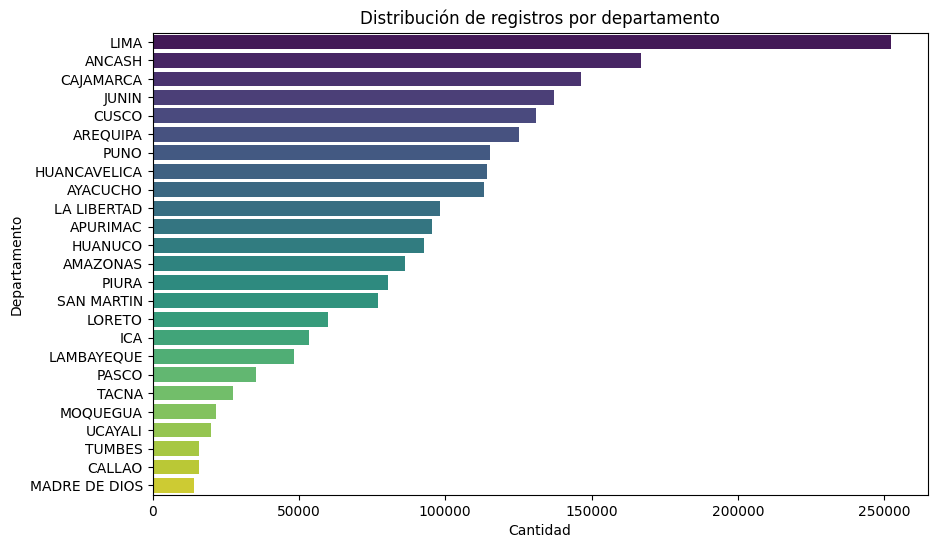

In [431]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la frecuencia de cada departamento
freq_df = df['departamento'].value_counts().reset_index()
freq_df.columns = ['departamento', 'Frecuencia']

# Ordenar si deseas mostrar de mayor a menor
freq_df = freq_df.sort_values('Frecuencia', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=freq_df,
    y='departamento',
    x='Frecuencia',
    hue='departamento',    # se añade hue
    palette='viridis',
    legend=False          # no mostramos la leyenda
)
plt.title('Distribución de registros por departamento')
plt.xlabel('Cantidad')
plt.ylabel('Departamento')
plt.show()


### Análisis Univariado para provincia

In [432]:
# Crear tabla combinada de conteo y porcentaje
tabla_univariado = pd.DataFrame({
    'Frecuencia': df['provincia'].value_counts(),
    'Porcentaje': (df['provincia'].value_counts(normalize=True) * 100).round(2)
})

# Mostrar tabla
print("Análisis univariado de la columna 'provincia':")
tabla_univariado


Análisis univariado de la columna 'provincia':


Frecuencia  Porcentaje
provincia                                    
LIMA                       125541        5.86
AREQUIPA                    35726        1.67
JAUJA                       35228        1.64
HUAROCHIRI                  32545        1.52
HUANCAYO                    30757        1.43
...                           ...         ...
CONTRALMIRANTE VILLAR        3145        0.15
PUTUMAYO                     2269        0.11
ASUNCION                     2212        0.10
CAѐETE                       1962        0.09
PURUS                        1229        0.06

[197 rows x 2 columns]

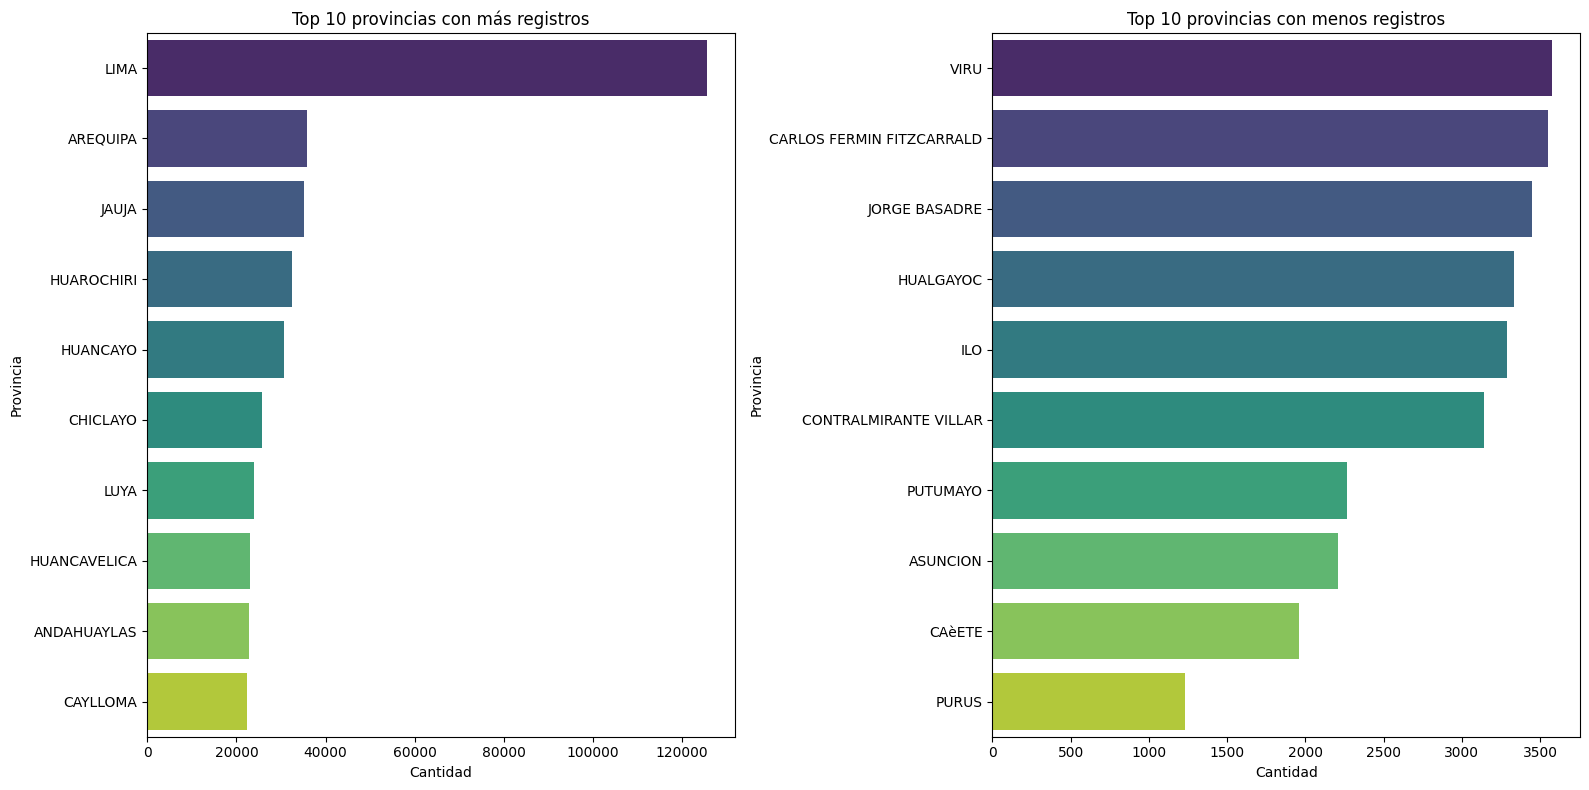

In [433]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular frecuencias por provincia
frecuencias = df['provincia'].value_counts()

# Top 10 provincias con más registros
top_10_altas = frecuencias.head(10)

# Top 10 provincias con menos registros
top_10_bajas = frecuencias.tail(10)

# Crear DataFrames auxiliares
df_top_altas = pd.DataFrame({
    'Provincia': top_10_altas.index,
    'Frecuencia': top_10_altas.values
})

df_top_bajas = pd.DataFrame({
    'Provincia': top_10_bajas.index,
    'Frecuencia': top_10_bajas.values
})

# Crear figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Gráfico top 10 altas
sns.barplot(
    data=df_top_altas,
    y='Provincia',
    x='Frecuencia',
    hue='Provincia',
    palette='viridis',
    legend=False,
    ax=axes[0]
)
axes[0].set_title('Top 10 provincias con más registros')
axes[0].set_xlabel('Cantidad')
axes[0].set_ylabel('Provincia')

# Gráfico top 10 bajas
sns.barplot(
    data=df_top_bajas,
    y='Provincia',
    x='Frecuencia',
    hue='Provincia',
    palette='viridis',
    legend=False,
    ax=axes[1]
)
axes[1].set_title('Top 10 provincias con menos registros')
axes[1].set_xlabel('Cantidad')
axes[1].set_ylabel('Provincia')

plt.tight_layout()
plt.show()


Las provincias con más registros, como Lima, reflejan una alta densidad poblacional y mejor infraestructura de salud y recopilación de datos. En contraste, provincias con menos registros, como Purús, Cabete, Asunción y Putumayo, probablemente tienen poblaciones más reducidas y podrían sufrir de subrepresentación o menor cobertura de datos, especialmente en áreas remotas. Esta disparidad resalta la importancia de considerar el contexto demográfico y la calidad de la recolección de información al interpretar los resultados a nivel provincial.

Para este análisis, debido a la mayor proporción de datos provenientes de la provincia de Lima, trabajaremos únicamente con ese subconjunto de datos:


In [434]:
df = df.query('provincia == "LIMA"')


### Análisis Univariado para distrito

In [435]:
# Crear tabla combinada de conteo y porcentaje
tabla_univariado = pd.DataFrame({
    'Frecuencia': df['distrito'].value_counts(),
    'Porcentaje': (df['distrito'].value_counts(normalize=True) * 100).round(2)
})

# Mostrar tabla
print("Análisis univariado de la columna 'distrito':")
tabla_univariado


Análisis univariado de la columna 'distrito':


Frecuencia  Porcentaje
distrito                                       
LIMA                           7418        5.91
SAN JUAN DE LURIGANCHO         4750        3.78
SANTIAGO DE SURCO              4217        3.36
SAN MARTIN DE PORRES           4110        3.27
ATE                            3902        3.11
LOS OLIVOS                     3888        3.10
PACHACAMAC                     3756        2.99
SAN JUAN DE MIRAFLORES         3754        2.99
COMAS                          3680        2.93
VILLA EL SALVADOR              3638        2.90
VILLA MARIA DEL TRIUNFO        3629        2.89
EL AGUSTINO                    3618        2.88
PUENTE PIEDRA                  3433        2.73
CHORRILLOS                     3393        2.70
SANTA ANITA                    3391        2.70
INDEPENDENCIA                  3333        2.65
RIMAC                          3282        2.61
LA VICTORIA                    3195        2.54
CARABAYLLO                     3127        2.49
LA MOLINA                      3099        2.47
ANCON                          3007        2.40
LURIGANCHO                     2763        2.20
LURIN                          2709        2.16
BARRANCO                       2695        2.15
SAN MIGUEL                     2651        2.11
CHACLACAYO                     2536        2.02
CIENEGUILLA                    2380        1.90
SAN BORJA                      2314        1.84
SAN LUIS                       2278        1.81
BRE�A                          2182        1.74
JESUS MARIA                    2175        1.73
SURQUILLO                      2060        1.64
PUCUSANA                       2021        1.61
MAGDALENA DEL MAR              2008        1.60
MIRAFLORES                     1957        1.56
PUEBLO LIBRE                   1923        1.53
LINCE                          1907        1.52
SANTA ROSA                     1903        1.52
PUNTA NEGRA                    1678        1.34
SAN BARTOLO                    1675        1.33
SAN ISIDRO                     1613        1.28
PUNTA HERMOSA                  1497        1.19
SANTA MARIA DEL MAR             996        0.79

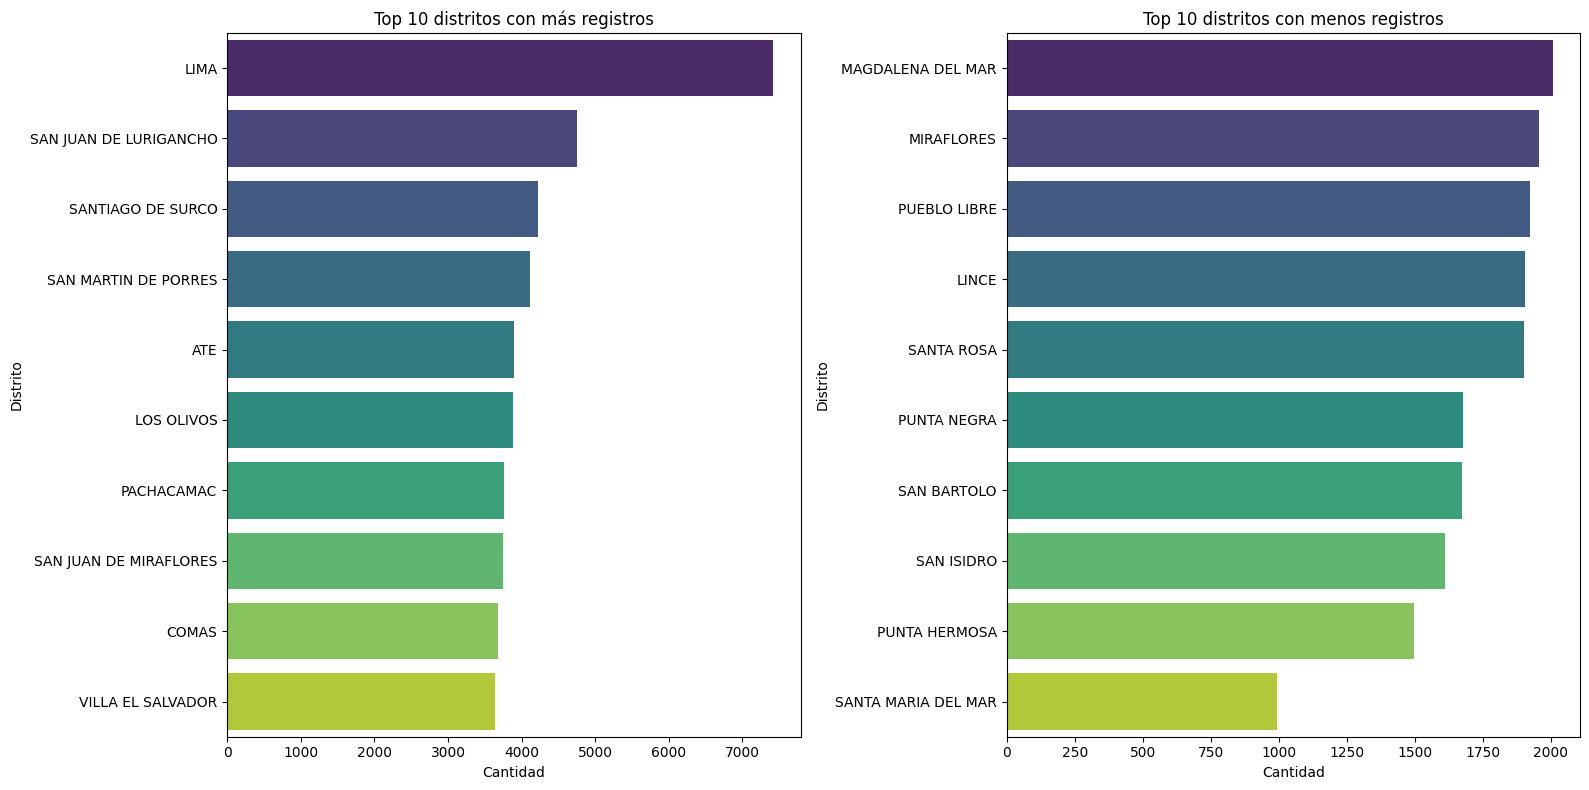

In [436]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular frecuencias por distrito
frecuencias = df['distrito'].value_counts()

# Top 10 distritos con más registros
top_10_altas = frecuencias.head(10)

# Top 10 distritos con menos registros
top_10_bajas = frecuencias.tail(10)

# Crear DataFrames auxiliares
df_top_altas = pd.DataFrame({
    'Distrito': top_10_altas.index,
    'Frecuencia': top_10_altas.values
})

df_top_bajas = pd.DataFrame({
    'Distrito': top_10_bajas.index,
    'Frecuencia': top_10_bajas.values
})

# Crear figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Gráfico top 10 altas
sns.barplot(
    data=df_top_altas,
    y='Distrito',
    x='Frecuencia',
    hue='Distrito',
    palette='viridis',
    legend=False,
    ax=axes[0]
)
axes[0].set_title('Top 10 distritos con más registros')
axes[0].set_xlabel('Cantidad')
axes[0].set_ylabel('Distrito')

# Gráfico top 10 bajas
sns.barplot(
    data=df_top_bajas,
    y='Distrito',
    x='Frecuencia',
    hue='Distrito',
    palette='viridis',
    legend=False,
    ax=axes[1]
)
axes[1].set_title('Top 10 distritos con menos registros')
axes[1].set_xlabel('Cantidad')
axes[1].set_ylabel('Distrito')

plt.tight_layout()
plt.show()


### Análisis Univariado para año

In [437]:
# Crear tabla combinada de conteo y porcentaje para la columna 'ano'
tabla_univariado_ano = pd.DataFrame({
    'Frecuencia': df['ano'].value_counts(),
    'Porcentaje': (df['ano'].value_counts(normalize=True) * 100).round(2)
})

# Mostrar tabla
print("Análisis univariado de la columna 'ano':")
tabla_univariado_ano


Análisis univariado de la columna 'ano':


Frecuencia  Porcentaje
ano                         
2018        6512        5.19
2023        6464        5.15
2019        6454        5.14
2022        6385        5.09
2017        6296        5.02
2016        6295        5.01
2014        5915        4.71
2013        5833        4.65
2015        5808        4.63
2010        5674        4.52
2012        5597        4.46
2011        5526        4.40
2009        5478        4.36
2021        5472        4.36
2008        4992        3.98
2020        4840        3.86
2007        4547        3.62
2006        4425        3.52
2005        3941        3.14
2003        3904        3.11
2004        3843        3.06
2001        3841        3.06
2002        3823        3.05
2000        3676        2.93

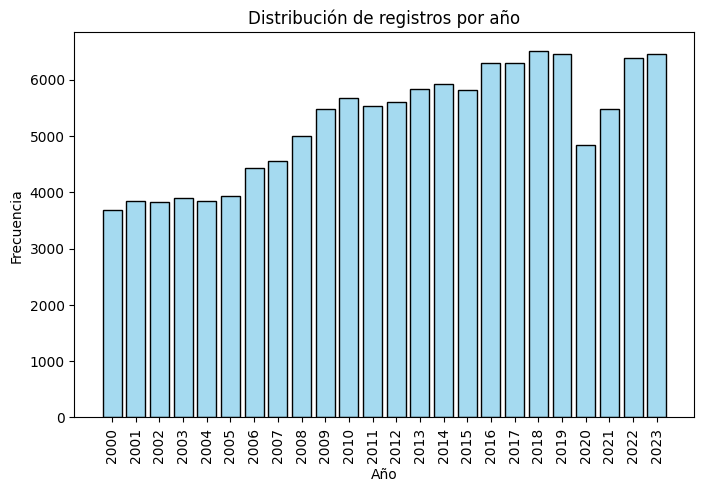

In [438]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener todos los años únicos ordenados
all_years = sorted(df['ano'].unique())

plt.figure(figsize=(8, 5))

# Histograma
ax = sns.histplot(
    data=df,
    x='ano',
    discrete=True,
    shrink=0.8,
    color='skyblue'
)

# Forzar etiquetas del eje X en vertical
ax.set_xticks(all_years)
ax.set_xticklabels(all_years, rotation=90)

plt.title('Distribución de registros por año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.show()


### Análisis Univariado para semana

In [439]:
# Crear tabla combinada de conteo y porcentaje para la columna 'semana'
tabla_univariado_semana = pd.DataFrame({
    'Frecuencia': df['semana'].value_counts(),
    'Porcentaje': (df['semana'].value_counts(normalize=True) * 100).round(2)
})

# Mostrar tabla
print("Análisis univariado de la columna 'semana':")
tabla_univariado_semana


Análisis univariado de la columna 'semana':


Frecuencia  Porcentaje
semana                        
20            2496        1.99
19            2491        1.98
30            2485        1.98
22            2472        1.97
21            2470        1.97
41            2465        1.96
46            2464        1.96
23            2461        1.96
27            2456        1.96
31            2455        1.96
25            2454        1.95
45            2451        1.95
24            2444        1.95
15            2442        1.95
42            2439        1.94
47            2439        1.94
18            2433        1.94
43            2431        1.94
12            2427        1.93
36            2426        1.93
40            2425        1.93
16            2425        1.93
37            2420        1.93
38            2417        1.93
44            2415        1.92
17            2415        1.92
35            2414        1.92
48            2414        1.92
26            2414        1.92
49            2413        1.92
33            2412        1.92
29            2410        1.92
28            2409        1.92
39            2405        1.92
13            2404        1.91
32            2398        1.91
14            2391        1.90
52            2387        1.90
1             2378        1.89
50            2378        1.89
11            2375        1.89
34            2373        1.89
51            2372        1.89
10            2356        1.88
8             2332        1.86
2             2332        1.86
4             2324        1.85
7             2310        1.84
3             2301        1.83
9             2297        1.83
5             2282        1.82
6             2264        1.80
53             377        0.30
0                1        0.00

In [440]:
df_query = df.query('semana == 0')
df_query

departamento provincia    distrito   ano  semana sub_reg_nt  ubigeo  \
1446244         LIMA      LIMA  CARABAYLLO  2021       0         51  150106   

         ira_no_neumonia  neumonias_men5  neumonias_60mas  \
1446244                1               0                0   

         hospitalizados_men5  hospitalizados_60mas  defunciones_men5  \
1446244                    0                     0                 0   

         defunciones_60mas  
1446244                  0

Vamos a proceder a eliminar esta información de semana 0 porque solo representa 1 registro de todo Lima en la semana epidemiológica 0.

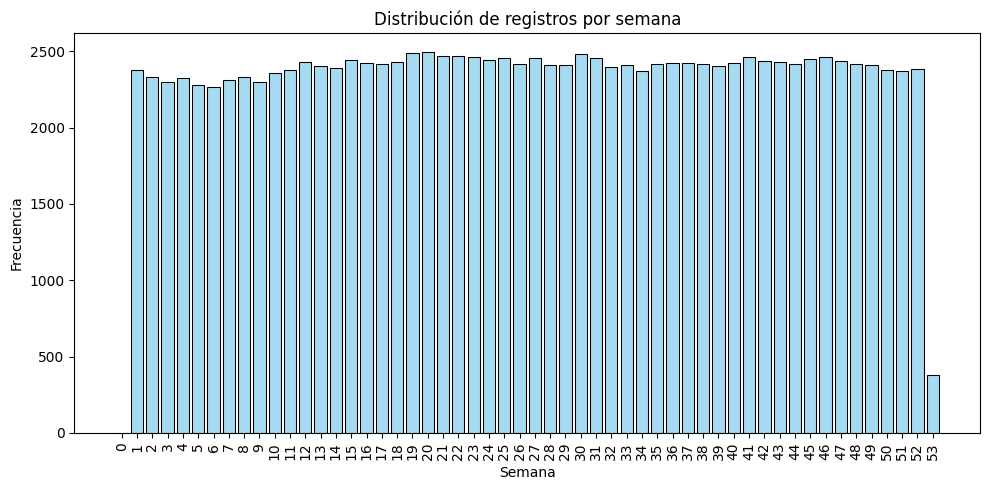

In [441]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener todas las semanas únicas ordenadas
all_weeks = sorted(df['semana'].unique())

plt.figure(figsize=(10, 5))  # puedes ajustar el tamaño si hay muchas semanas

# Histograma
ax = sns.histplot(
    data=df,
    x='semana',
    discrete=True,
    shrink=0.8,
    color='skyblue'
)

# Forzar etiquetas del eje X en vertical
ax.set_xticks(all_weeks)
ax.set_xticklabels(all_weeks, rotation=90)

plt.title('Distribución de registros por semana')
plt.xlabel('Semana')
plt.ylabel('Frecuencia')
plt.tight_layout()  # evitar que se corten las etiquetas
plt.show()


Vamos a eliminar la semana 53, ya que contiene pocos registros. Esto se debe a que, en estos estudios de vigilancia epidemiológica, al término del proyecto la cantidad de personas disminuye (puesto que la vigilancia llega a su fin).

In [442]:
df = df.query('semana != 53')


### Análisis Univariado para sub_reg_nt

In [443]:
# Crear tabla combinada de conteo y porcentaje para la columna 'sub_reg_nt'
tabla_univariado_sub_reg_nt = pd.DataFrame({
    'Frecuencia': df['sub_reg_nt'].value_counts(),
    'Porcentaje': (df['sub_reg_nt'].value_counts(normalize=True) * 100).round(2)
})

# Mostrar tabla
print("Análisis univariado de la columna 'sub_reg_nt':")
tabla_univariado_sub_reg_nt


Análisis univariado de la columna 'sub_reg_nt':


Frecuencia  Porcentaje
sub_reg_nt                        
50               47617       38.04
52               19928       15.92
7                19180       15.32
53               18936       15.13
51               15132       12.09
42                1213        0.97
12                 662        0.53
13                 580        0.46
4                  545        0.44
11                 309        0.25
2                  279        0.22
8                  242        0.19
10                 179        0.14
19                 151        0.12
36                  65        0.05
9                   47        0.04
22                  30        0.02
14                  20        0.02
5                   18        0.01
35                  12        0.01
33                  10        0.01
38                   4        0.00
16                   1        0.00
21                   1        0.00
32                   1        0.00
24                   1        0.00
31                   1        0.00

Aún cuando tenemos como objetivo de proyecto poder predecir la cantidad de casos de hospitalizaciones en niños menores de 5 años, vamos a evaluar también la población de personas mayores de 60 años, puesto que resulta importante entender el contexto global de la salud pública.

### Análisis Univariado para ira_no_neumonia

In [444]:
# Crear tabla combinada de conteo y porcentaje para la columna 'ira_no_neumonia'
tabla_univariado_ira_no_neumonia = pd.DataFrame({
    'Frecuencia': df['ira_no_neumonia'].value_counts(),
    'Porcentaje': (df['ira_no_neumonia'].value_counts(normalize=True) * 100).round(2)
})

# Mostrar tabla
print("Análisis univariado de la columna 'ira_no_neumonia':")
tabla_univariado_ira_no_neumonia


Análisis univariado de la columna 'ira_no_neumonia':


Frecuencia  Porcentaje
ira_no_neumonia                        
1                     19395       15.50
2                      7969        6.37
0                      7958        6.36
3                      4734        3.78
4                      3457        2.76
...                     ...         ...
1343                      1        0.00
1846                      1        0.00
1675                      1        0.00
1628                      1        0.00
1743                      1        0.00

[1619 rows x 2 columns]

#### Detección de outliers para ira_no_neumonia

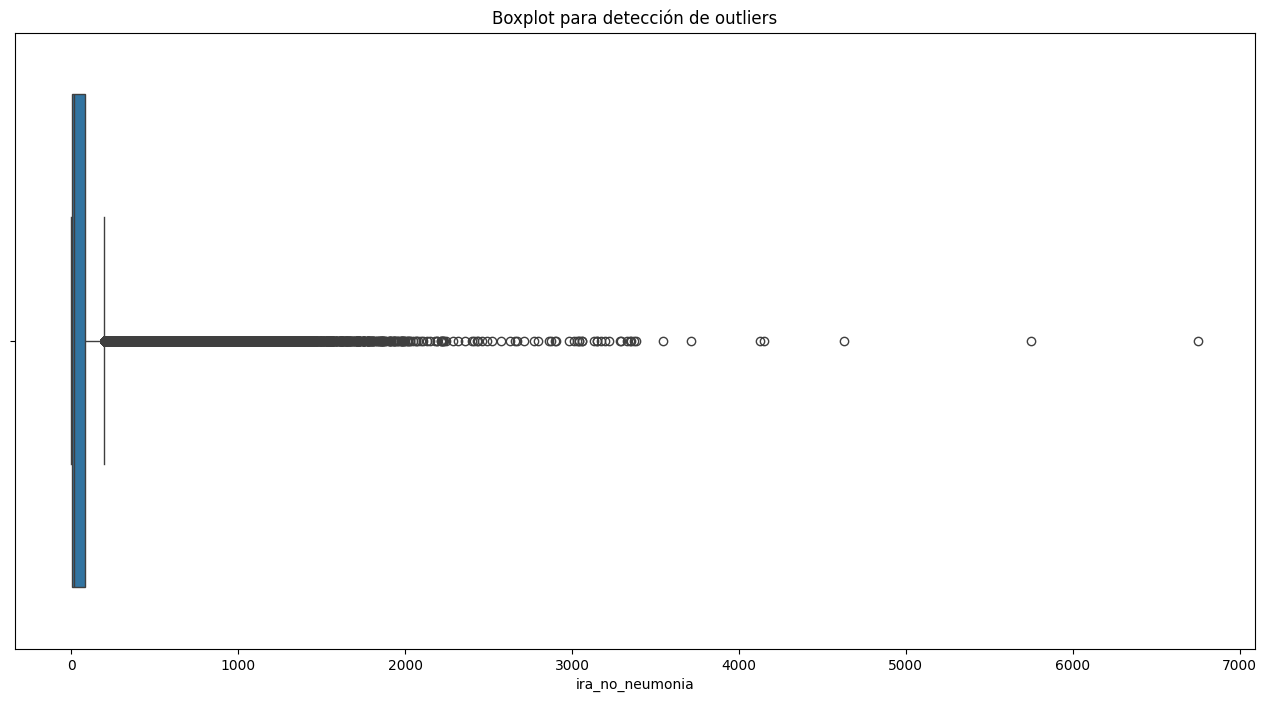

In [445]:
plt.figure(figsize=(16,8))
sns.boxplot(x=df['ira_no_neumonia'])
plt.title('Boxplot para detección de outliers')
plt.show()


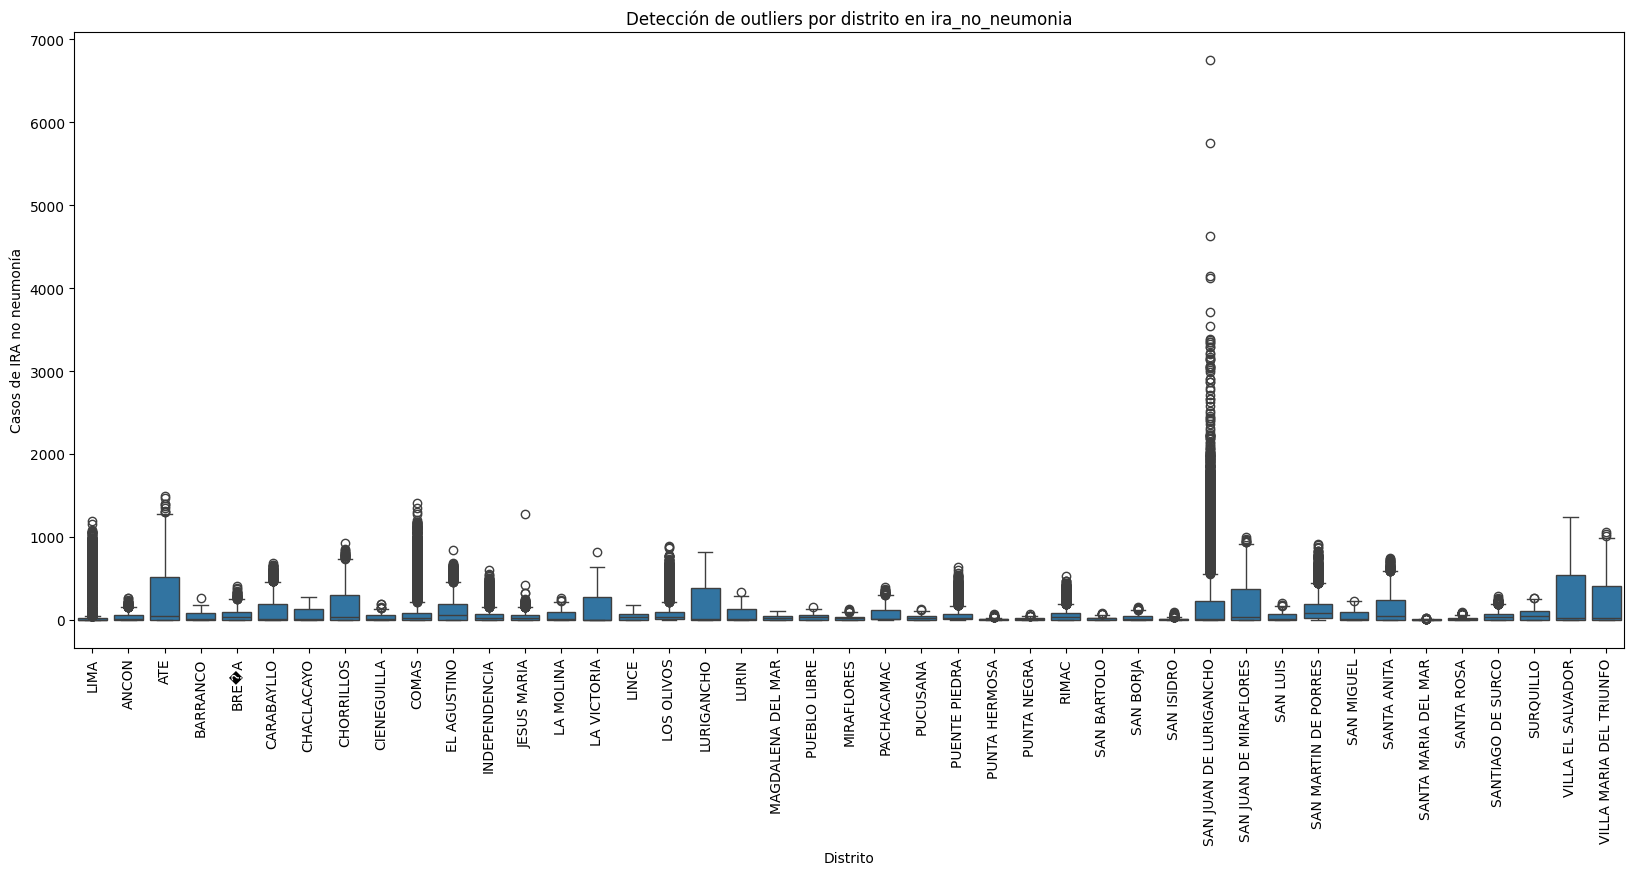

In [446]:
plt.figure(figsize=(20, 8))
sns.boxplot(data=df, x='distrito', y='ira_no_neumonia')
plt.title('Detección de outliers por distrito en ira_no_neumonia')
plt.xlabel('Distrito')
plt.ylabel('Casos de IRA no neumonía')
plt.xticks(rotation=90)
plt.show()


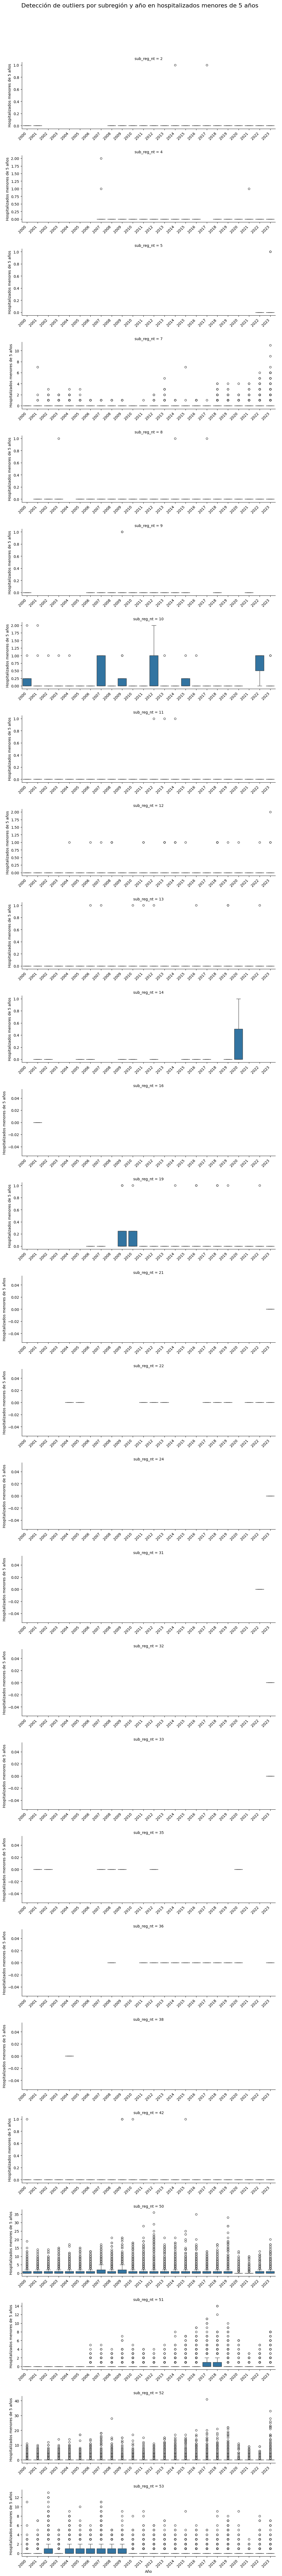

In [447]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el gráfico
g = sns.catplot(
    data=df,
    x='ano',
    y='hospitalizados_men5',
    kind='box',
    row='sub_reg_nt',
    height=3.5,
    aspect=3,
    sharey=False
)

# Ajustar espaciado y títulos
g.fig.subplots_adjust(hspace=0.4)
g.fig.suptitle('Detección de outliers por subregión y año en hospitalizados menores de 5 años', fontsize=16, y=1.02)
g.set_xlabels('Año')
g.set_ylabels('Hospitalizados menores de 5 años')

# 🔹 Mostrar etiquetas del eje X en todas las filas
for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)   # Activa etiquetas del eje X
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')  # Rota las etiquetas para legibilidad

plt.show()


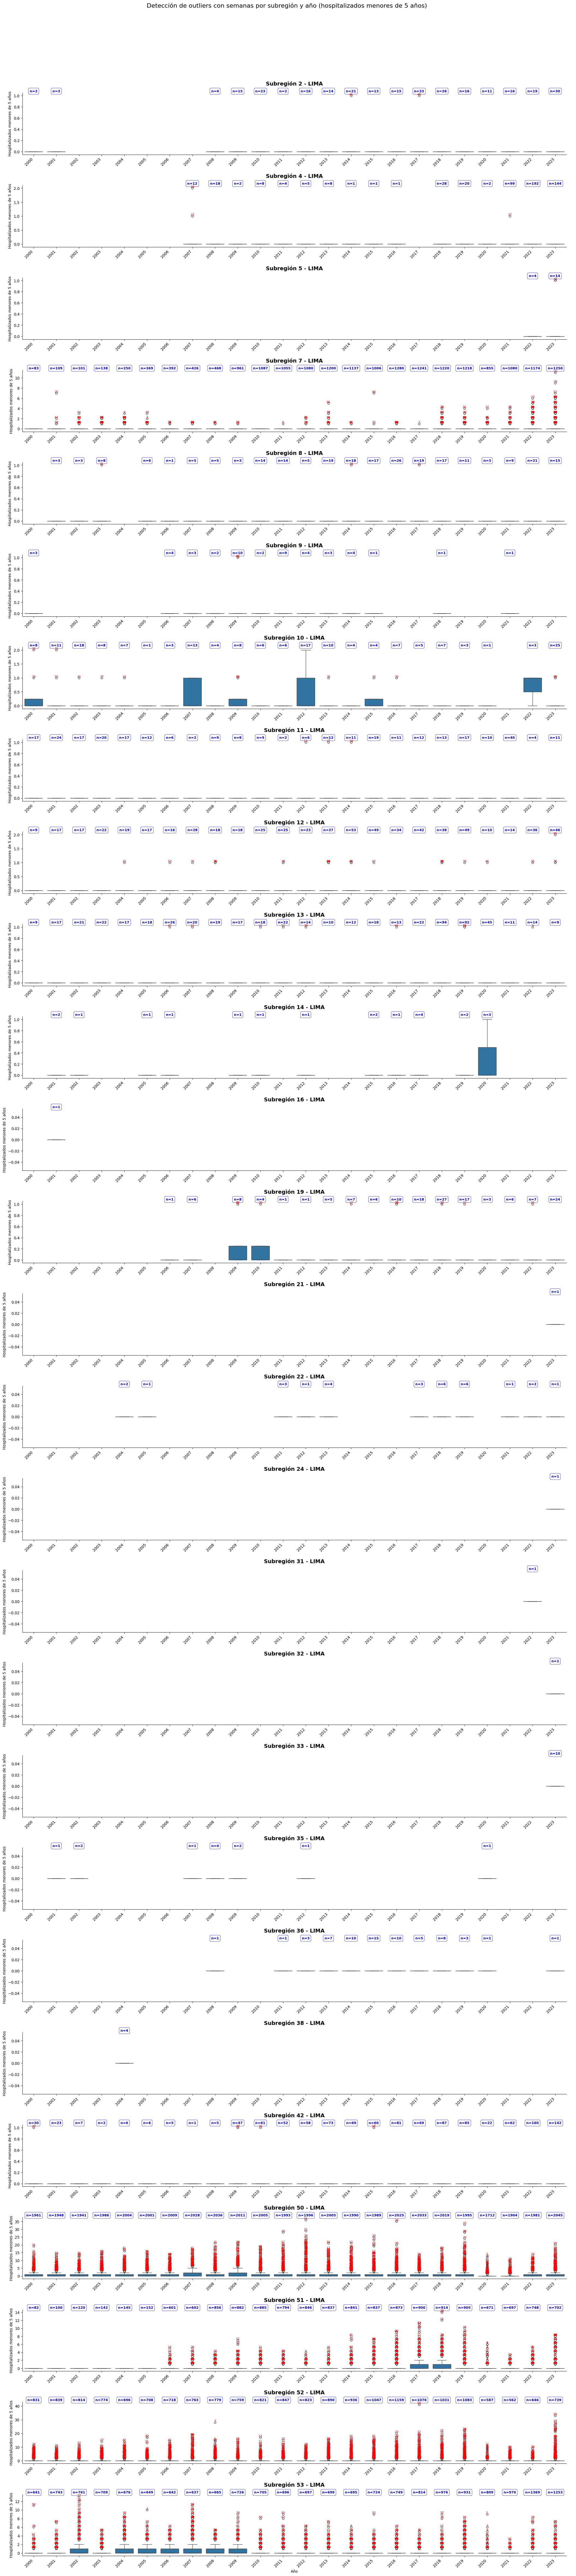

In [448]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# --- 1️⃣ Detectar outliers por sub_reg_nt y año ---
def detectar_outliers(df, col_grupo1, col_grupo2, col_valor):
    outliers = []
    for (subreg, ano), grupo in df.groupby([col_grupo1, col_grupo2]):
        Q1 = grupo[col_valor].quantile(0.25)
        Q3 = grupo[col_valor].quantile(0.75)
        IQR = Q3 - Q1
        lim_inf = Q1 - 1.5 * IQR
        lim_sup = Q3 + 1.5 * IQR
        grupo_out = grupo[(grupo[col_valor] < lim_inf) | (grupo[col_valor] > lim_sup)].copy()
        grupo_out["sub_reg_nt"] = subreg
        grupo_out["ano"] = ano
        outliers.append(grupo_out)
    if outliers:
        return pd.concat(outliers, ignore_index=True)
    else:
        return pd.DataFrame(columns=df.columns)

df_outliers = detectar_outliers(df, 'sub_reg_nt', 'ano', 'hospitalizados_men5')

# --- 🔵 Crear diccionario de subregión -> (departamento, provincia, distrito) ---
sub_reg_info = df.groupby('sub_reg_nt').agg({
    'departamento': 'first',
    'provincia': 'first',
    'distrito': 'first'
}).to_dict('index')

# --- 2️⃣ Crear el gráfico base con mayor ancho ---
g = sns.catplot(
    data=df,
    x='ano',
    y='hospitalizados_men5',
    kind='box',
    row='sub_reg_nt',
    height=3.5,
    aspect=6,
    sharey=False
)

# --- 3️⃣ Agregar anotaciones con la semana de los outliers ---
# Obtener el orden de sub_reg_nt usado por seaborn
sub_reg_order = [int(ax.get_title().split('=')[-1].strip()) for ax in g.axes.flatten() if ax.get_title()]

# Crear mapeo de años a posiciones en el eje x
anos_unicos = sorted(df['ano'].unique())
ano_to_pos = {ano: i for i, ano in enumerate(anos_unicos)}

for i, ax in enumerate(g.axes.flatten()):
    if i >= len(sub_reg_order):
        break
    
    sub_reg_actual = sub_reg_order[i]
    subset = df_outliers[df_outliers['sub_reg_nt'] == sub_reg_actual]
    
    # 🔵 Crear título personalizado con departamento, provincia y distrito
    dept = sub_reg_info[sub_reg_actual]['departamento']
    prov = sub_reg_info[sub_reg_actual]['provincia']
    dist = sub_reg_info[sub_reg_actual]['distrito']
    titulo_personalizado = f"Subregión {sub_reg_actual} - {dept}"
    ax.set_title(titulo_personalizado, fontsize=14, fontweight='bold', pad=20)
    
    # 🔵 Agregar conteo de registros por año en la parte superior
    subset_subreg = df[df['sub_reg_nt'] == sub_reg_actual]
    conteos = subset_subreg.groupby('ano').size()
    
    y_max = ax.get_ylim()[1]
    
    for ano in anos_unicos:
        if ano in conteos.index:
            x_pos = ano_to_pos[ano]
            count = conteos[ano]
            ax.text(
                x=x_pos,
                y=y_max,
                s=f'n={count}',
                color='blue',
                fontsize=9,
                ha='center',
                va='bottom',
                fontweight='bold',
                bbox=dict(
                    boxstyle='round,pad=0.4',
                    facecolor='white',
                    edgecolor='blue',
                    alpha=0.6
                )
            )
    
    # 🔴 Agregar anotaciones de outliers (semana)
    for _, row in subset.iterrows():
        x_pos = ano_to_pos.get(row['ano'], row['ano'])
        ax.text(
            x=x_pos,
            y=row['hospitalizados_men5'],
            s=str(int(row['semana'])),
            color='red',
            fontsize=8,
            ha='center',
            va='bottom'
        )

# --- 4️⃣ Ajustar formato ---
g.fig.subplots_adjust(hspace=0.5, top=0.96)
g.fig.suptitle('Detección de outliers con semanas por subregión y año (hospitalizados menores de 5 años)', fontsize=16, y=0.995)

g.set_xlabels('Año')
g.set_ylabels('Hospitalizados menores de 5 años')

for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()

Eliminación de sub_regiones con pocos datos. Porque se tienen pocos registros y no será viable hacer forecasting, eliminaremos las sub_reg_nt con escasa representatividad. Esto ayuda a evitar sesgos y mejorar la estabilidad del modelo.

In [449]:
subregiones_a_eliminar = [2, 5, 8, 9, 10, 11, 12, 13, 14, 16, 19, 21, 22, 24, 31, 32, 33, 35, 36, 38]
df = df[~df['sub_reg_nt'].isin(subregiones_a_eliminar)].reset_index(drop=True)

print(f"✅ DataFrame filtrado. Registros restantes: {len(df)}")
print(f"Subregiones eliminadas: {subregiones_a_eliminar}")


✅ DataFrame filtrado. Registros restantes: 122551
Subregiones eliminadas: [2, 5, 8, 9, 10, 11, 12, 13, 14, 16, 19, 21, 22, 24, 31, 32, 33, 35, 36, 38]


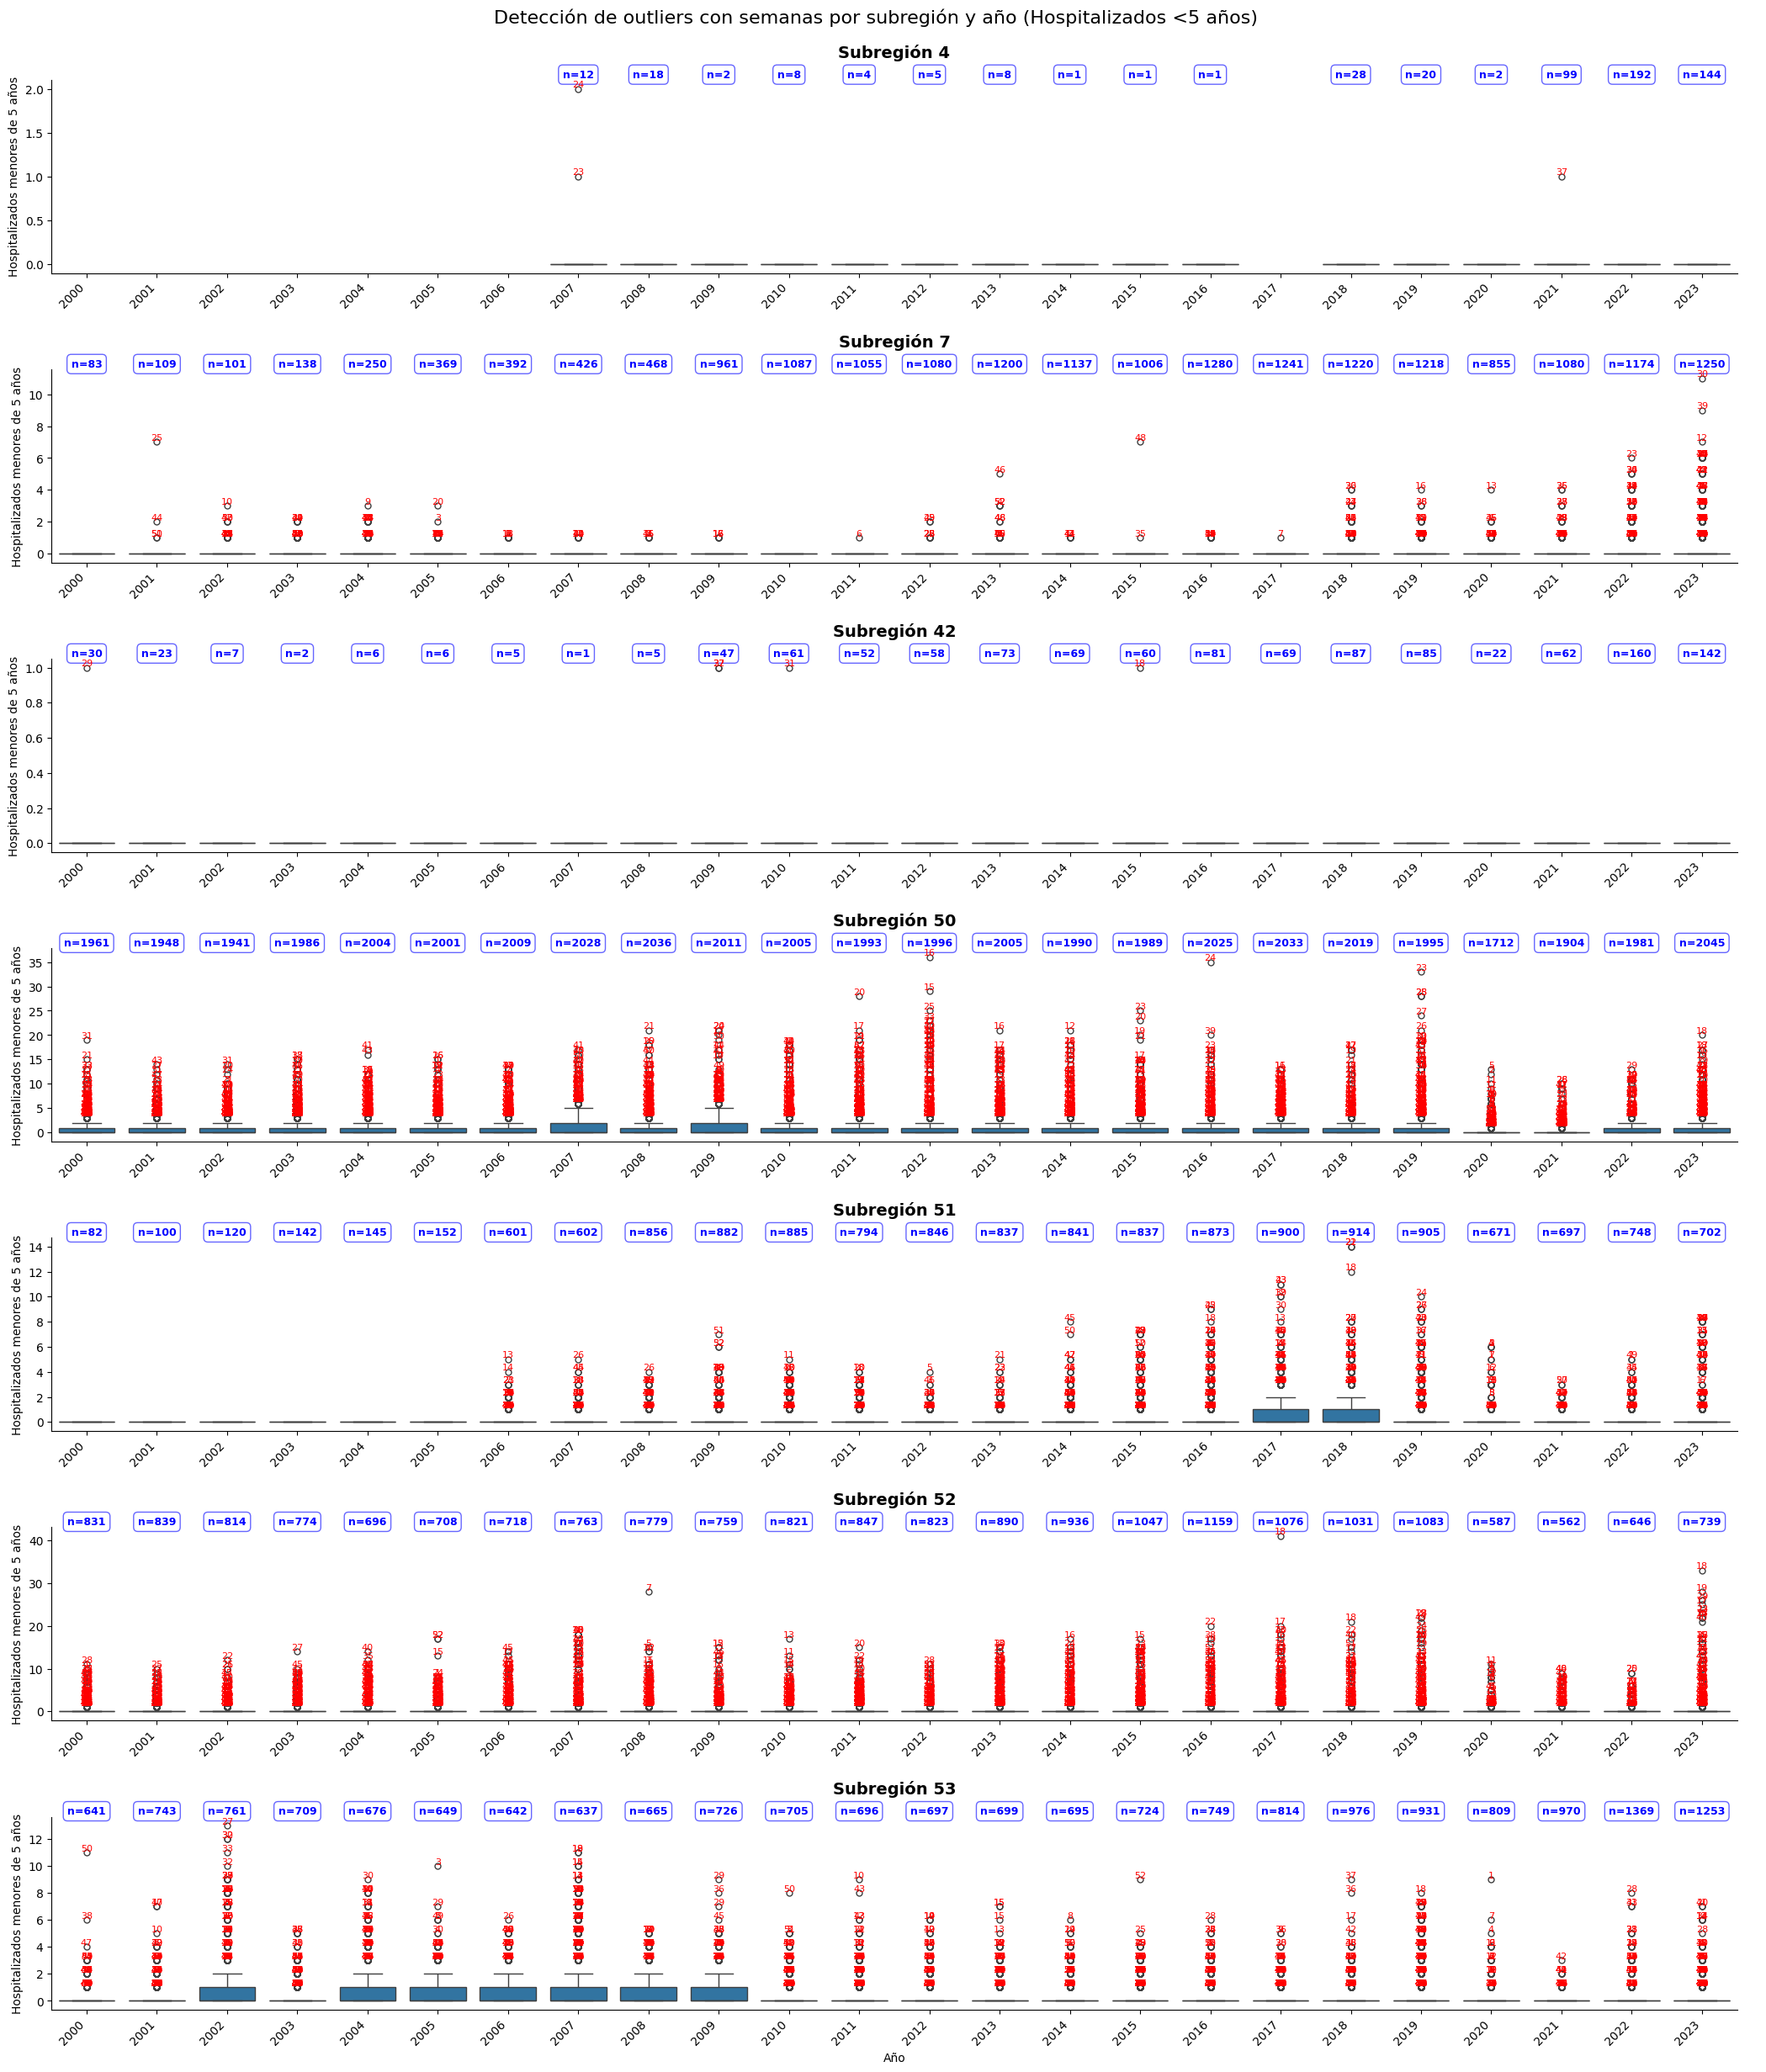

In [450]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# --- 1️⃣ Detectar outliers por sub_reg_nt y año ---
def detectar_outliers(df, col_grupo1, col_grupo2, col_valor):
    outliers = []
    for (subreg, ano), grupo in df.groupby([col_grupo1, col_grupo2]):
        Q1 = grupo[col_valor].quantile(0.25)
        Q3 = grupo[col_valor].quantile(0.75)
        IQR = Q3 - Q1
        lim_inf = Q1 - 1.5 * IQR
        lim_sup = Q3 + 1.5 * IQR
        grupo_out = grupo[(grupo[col_valor] < lim_inf) | (grupo[col_valor] > lim_sup)].copy()
        grupo_out["sub_reg_nt"] = subreg
        grupo_out["ano"] = ano
        outliers.append(grupo_out)
    if outliers:
        return pd.concat(outliers, ignore_index=True)
    else:
        return pd.DataFrame(columns=df.columns)

df_outliers = detectar_outliers(df, 'sub_reg_nt', 'ano', 'hospitalizados_men5')

# --- 2️⃣ Crear el gráfico base con mayor ancho ---
g = sns.catplot(
    data=df,
    x='ano',
    y='hospitalizados_men5',
    kind='box',
    row='sub_reg_nt',
    height=3.5,
    aspect=6,
    sharey=False
)

# --- 3️⃣ Agregar anotaciones con la semana de los outliers ---
# Obtener el orden de sub_reg_nt usado por seaborn
sub_reg_order = [int(ax.get_title().split('=')[-1].strip()) for ax in g.axes.flatten() if ax.get_title()]

# Crear mapeo de años a posiciones en el eje x
anos_unicos = sorted(df['ano'].unique())
ano_to_pos = {ano: i for i, ano in enumerate(anos_unicos)}

for i, ax in enumerate(g.axes.flatten()):
    if i >= len(sub_reg_order):
        break
    
    sub_reg_actual = sub_reg_order[i]
    subset = df_outliers[df_outliers['sub_reg_nt'] == sub_reg_actual]
    
    # 🔵 Quitar el título por defecto
    ax.set_title('')
    
    # 🔵 Agregar conteo de registros por año en la parte superior con fondo transparente
    subset_subreg = df[df['sub_reg_nt'] == sub_reg_actual]
    conteos = subset_subreg.groupby('ano').size()
    
    y_max = ax.get_ylim()[1]
    
    for ano in anos_unicos:
        if ano in conteos.index:
            x_pos = ano_to_pos[ano]
            count = conteos[ano]
            ax.text(
                x=x_pos,
                y=y_max,
                s=f'n={count}',
                color='blue',
                fontsize=9,
                ha='center',
                va='bottom',
                fontweight='bold',
                bbox=dict(
                    boxstyle='round,pad=0.4',
                    facecolor='white',
                    edgecolor='blue',
                    alpha=0.6
                )
            )
    
    # Agregar anotaciones de outliers con la semana
    for _, row in subset.iterrows():
        x_pos = ano_to_pos.get(row['ano'], row['ano'])
        
        ax.text(
            x=x_pos,
            y=row['hospitalizados_men5'],
            s=str(int(row['semana'])),
            color='red',
            fontsize=8,
            ha='center',
            va='bottom'
        )

# --- 4️⃣ Ajustar formato ---
g.fig.subplots_adjust(hspace=0.5, top=0.96)  # 🔵 Aumentado hspace para más separación vertical
g.fig.suptitle('Detección de outliers con semanas por subregión y año (Hospitalizados <5 años)', fontsize=16, y=0.995)

# 🔵 Configurar los títulos de las filas como cabecera con más separación
g.set_titles(row_template="Subregión {row_name}", size=14, weight='bold', y=1.08)  # 🔵 y=1.08 para mover hacia arriba

g.set_xlabels('Año')
g.set_ylabels('Hospitalizados menores de 5 años')

for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()


### Análisis multivariable

In [452]:
df.columns

Index(['departamento', 'provincia', 'distrito', 'ano', 'semana', 'sub_reg_nt',
       'ubigeo', 'ira_no_neumonia', 'neumonias_men5', 'neumonias_60mas',
       'hospitalizados_men5', 'hospitalizados_60mas', 'defunciones_men5',
       'defunciones_60mas'],
      dtype='object')

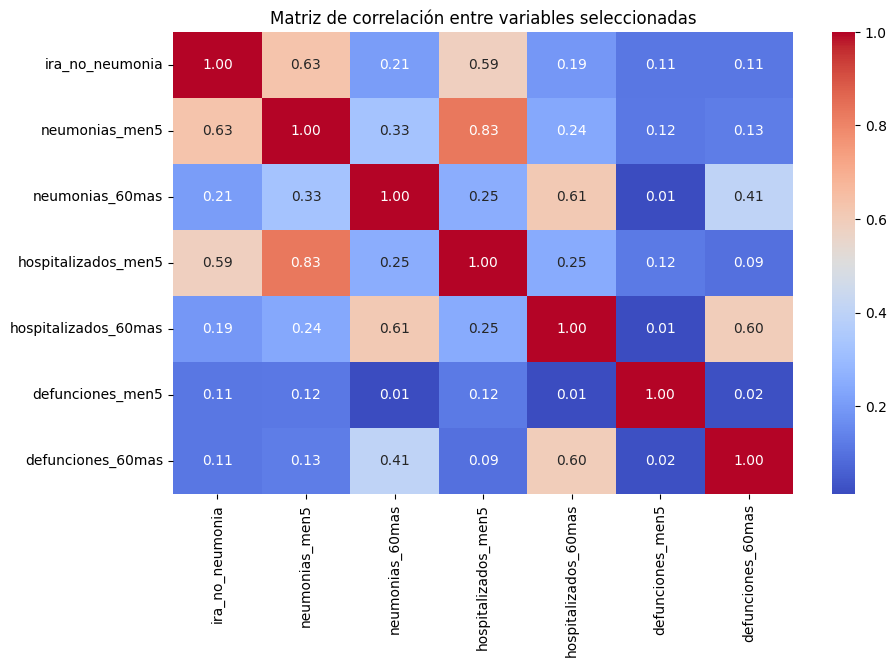

In [454]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas relevantes
cols = [
    'ira_no_neumonia', 
    'neumonias_men5', 
    'neumonias_60mas', 
    'hospitalizados_men5', 
    'hospitalizados_60mas', 
    'defunciones_men5', 
    'defunciones_60mas'
]

# Calcular la matriz de correlación solo con esas columnas
correlation_matrix = df[cols].corr()

# Plot de correlación (heatmap)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación entre variables seleccionadas')
plt.show()


Fuerte Correlación dentro de los Grupos de Edad:

Hay una correlación muy fuerte entre neumonias_men5 (neumonías en menores de 5 años) y hospitalizados_men5 (hospitalizados menores de 5 años) con un valor de 0.83. Esto es lógico: un aumento en los casos de neumonía en niños pequeños conduce directamente a un aumento en las hospitalizaciones de ese mismo grupo.

Se observa una correlación positiva fuerte entre hospitalizados_60mas (hospitalizados mayores de 60) y defunciones_60mas (defunciones en mayores de 60) con un valor de 0.6. Esto también es esperable, ya que un mayor número de hospitalizaciones en una población vulnerable puede estar asociado a un mayor número de fallecimientos.

In [ ]:
df.to_csv("../data/02_limpia/df_cleaned.csv", index=False, encoding="utf-8")


# Análisis de falta de semanas

Si bien el dataset no tiene valores nulos, realmente cada departamento, provincia, distrito, tendrá todas sus semanas completas desde el 2000 a 2023?

In [ ]:
df

departamento provincia                 distrito   ano  semana  \
0              LIMA      LIMA                     LIMA  2000       1   
1              LIMA      LIMA                     LIMA  2000       1   
2              LIMA      LIMA                     LIMA  2000       2   
3              LIMA      LIMA                     LIMA  2000       2   
4              LIMA      LIMA                     LIMA  2000       3   
...             ...       ...                      ...   ...     ...   
122546         LIMA      LIMA  VILLA MARIA DEL TRIUNFO  2023      51   
122547         LIMA      LIMA  VILLA MARIA DEL TRIUNFO  2023      51   
122548         LIMA      LIMA  VILLA MARIA DEL TRIUNFO  2023      51   
122549         LIMA      LIMA  VILLA MARIA DEL TRIUNFO  2023      52   
122550         LIMA      LIMA  VILLA MARIA DEL TRIUNFO  2023      52   

       sub_reg_nt  ubigeo  ira_no_neumonia  neumonias_men5  neumonias_60mas  \
0              50  150101              681               6                0   
1              52  150101                1               0                0   
2              50  150101              659               4                0   
3              52  150101                1               0                0   
4              50  150101              615               1                0   
...           ...     ...              ...             ...              ...   
122546         42  150143                1               0                0   
122547         50  150143                4               1                1   
122548         53  150143              362               5                7   
122549         50  150143                8               1                3   
122550         53  150143              365               9                8   

        hospitalizados_men5  hospitalizados_60mas  defunciones_men5  \
0                         1                     0                 0   
1                         0                     0                 0   
2                         0                     0                 0   
3                         0                     0                 0   
4                         4                     0                 0   
...                     ...                   ...               ...   
122546                    0                     0                 0   
122547                    1                     0                 0   
122548                    2                     0                 0   
122549                    0                     0                 0   
122550                    0                     1                 0   

        defunciones_60mas  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  
...                   ...  
122546                  0  
122547                  0  
122548                  0  
122549                  0  
122550                  1  

[122551 rows x 14 columns]

In [ ]:
df_departamento_hospitalizados_men5 = (
    df_complete.groupby(['departamento', 'ano'], as_index=False)
    .agg({'hospitalizados_men5': 'sum'})
)

In [ ]:
df_departamento_hospitalizados_men5

df_departamento_hospitalizados_men5_last_5_years = df_departamento_hospitalizados_men5.query('ano >= 2018')

In [ ]:
df_departamento_hospitalizados_men5_last_5_years

departamento   ano  hospitalizados_men5
18      AMAZONAS  2018                  105
19      AMAZONAS  2019                  106
20      AMAZONAS  2020                   11
21      AMAZONAS  2021                   17
22      AMAZONAS  2022                   66
..           ...   ...                  ...
595      UCAYALI  2019                  190
596      UCAYALI  2020                   84
597      UCAYALI  2021                   70
598      UCAYALI  2022                   99
599      UCAYALI  2023                  130

[150 rows x 3 columns]

C:\Users\quine\AppData\Local\Temp\ipykernel_14676\2878681306.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\quine\Documents\repos_github\Samsung_innovation_campus_proyecto\venv\Lib\site-packages\plotnine\ggplot.py:630: PlotnineWarning: Saving 8 x 10 in image.
c:\Users\quine\Documents\repos_github\Samsung_innovation_campus_proyecto\venv\Lib\site-packages\plotnine\ggplot.py:631: PlotnineWarning: Filename: reports/mapa_hospitalizados_2023.png


✅ Gráfico guardado: reports/mapa_hospitalizados_2023.png
📊 Mostrando mapa para el año 2023:



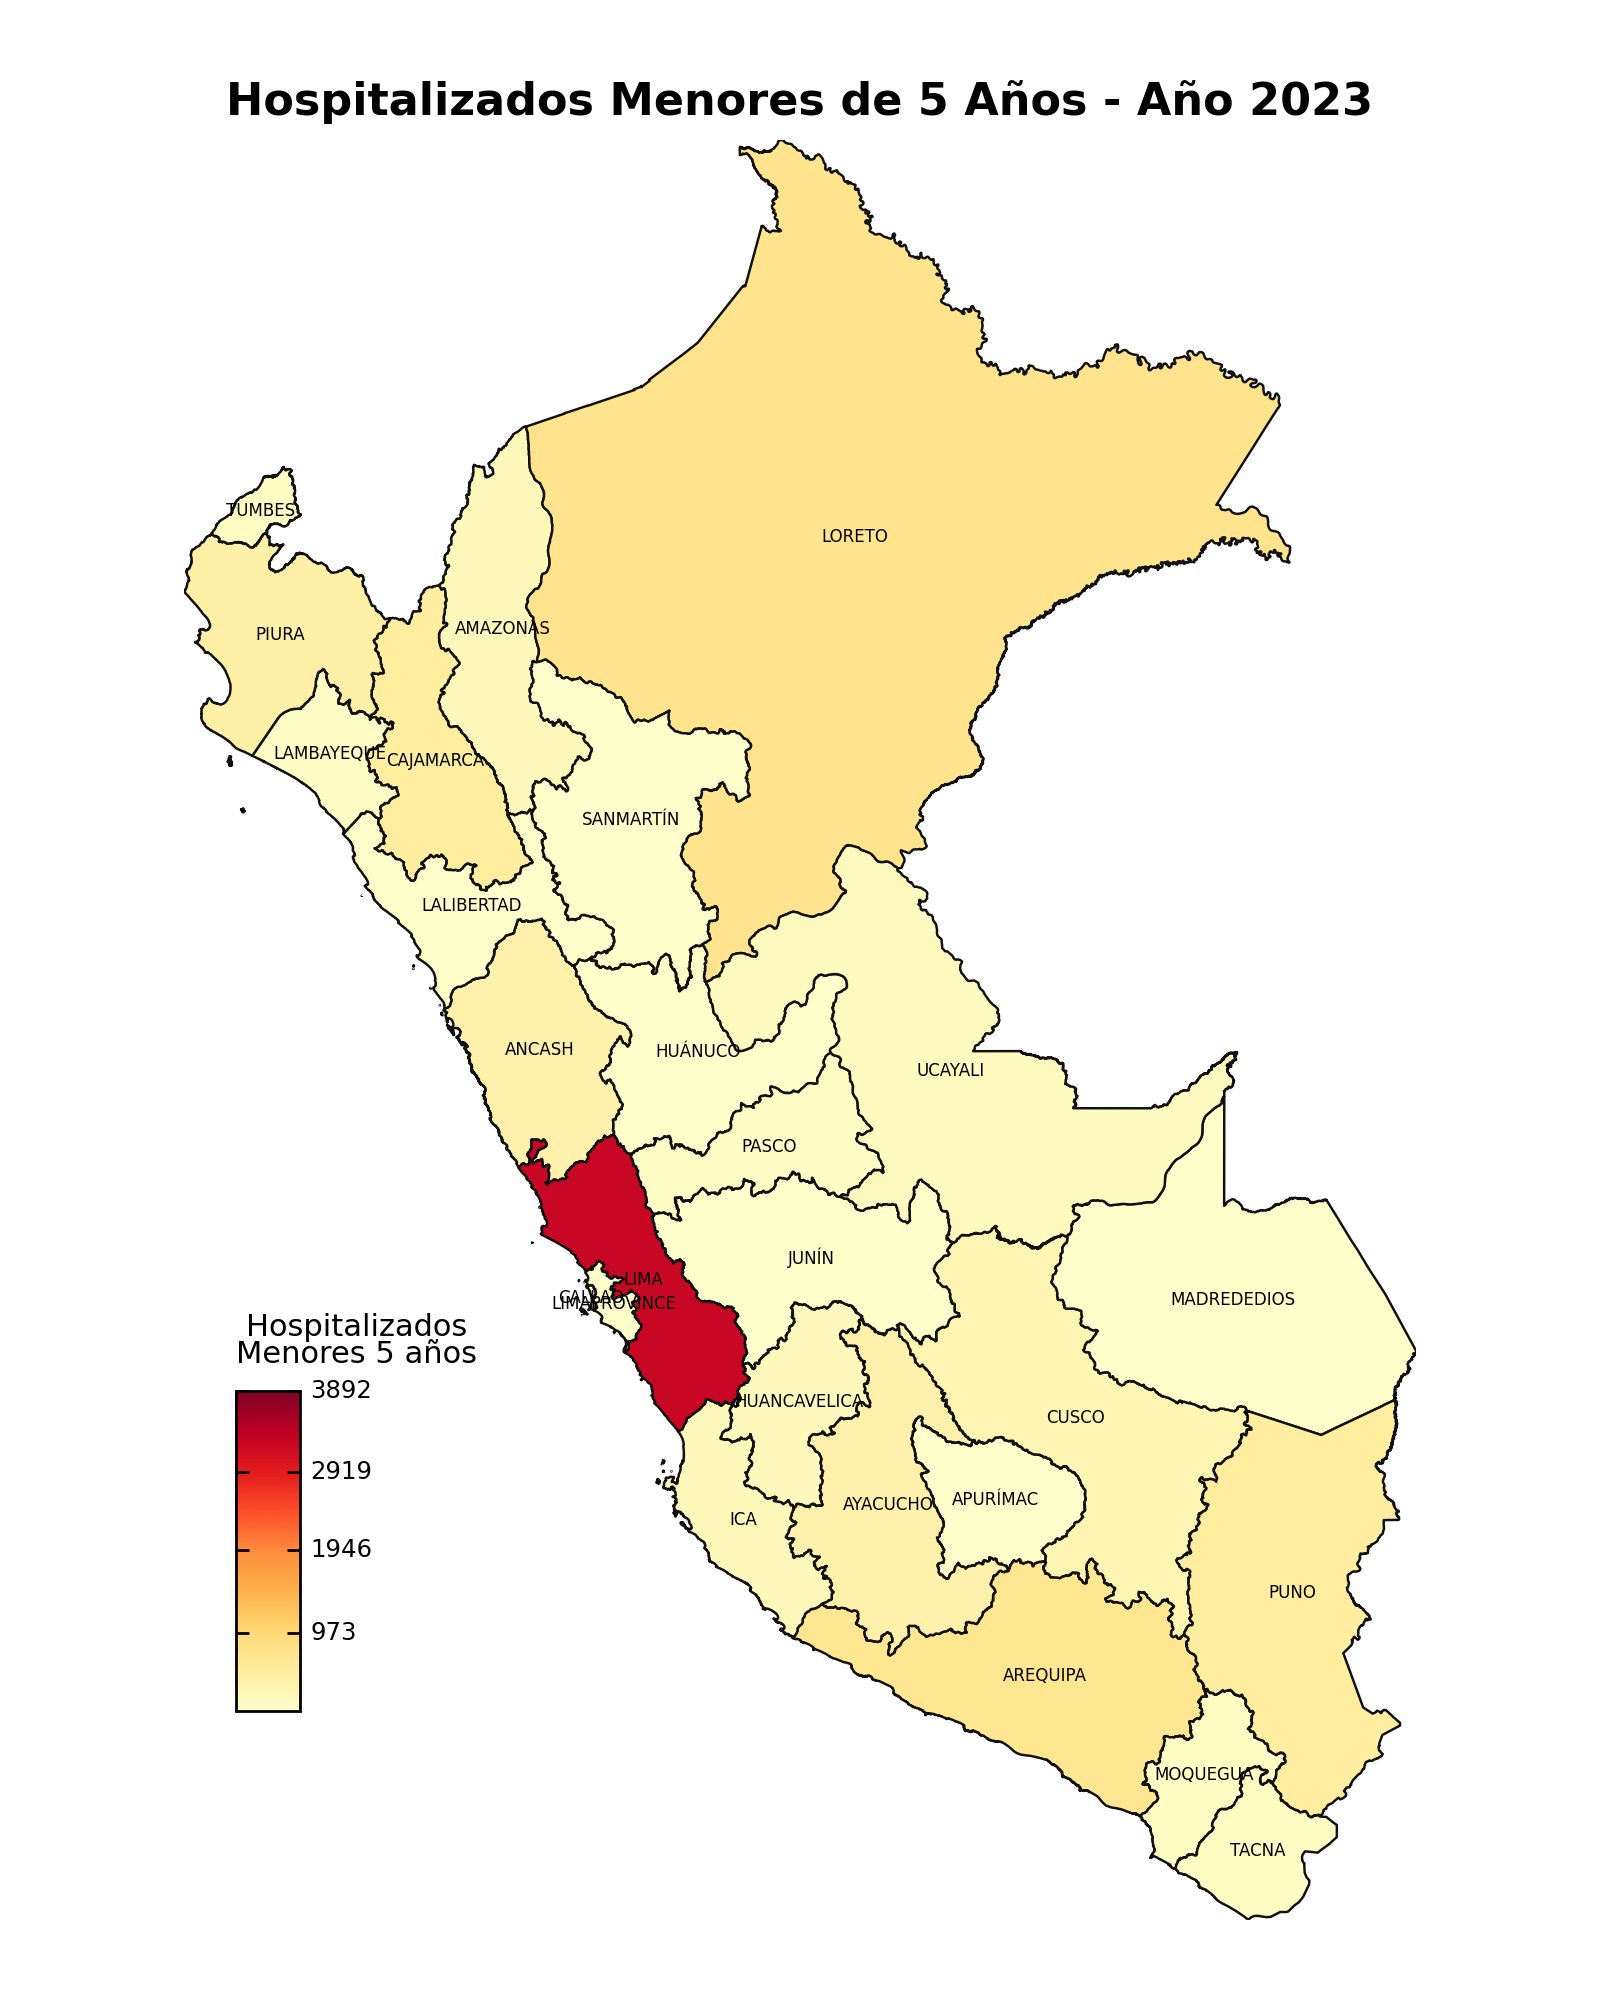

In [ ]:
# 1️⃣ Importar módulos
import geopandas as gp
import pandas as pd
import numpy as np
import os
from plotnine import (
    ggplot,
    aes,
    coord_fixed,
    geom_map,
    geom_text,
    labs,
    scale_fill_continuous,
    scale_fill_manual,
    theme_void,
    theme,
    element_rect,
    element_line,
    element_text,
    stage,
)

# 2️⃣ Funciones auxiliares
def good_centroid(geometry):
    """
    Calcula centroides 'buenos' para polígonos en la geometría.
    Usa proyección de área igual para mayor precisión.
    """
    return geometry.to_crs("+proj=cea").centroid.to_crs(geometry.crs)

def overlay_color(rgb_hex_colors, light="white", dark="black", threshold=0.5):
    """
    Determina color de texto (claro u oscuro) según el fondo.
    """
    def luminance(rgb_hex):
        r = int(rgb_hex[1:3], 16)
        g = int(rgb_hex[3:5], 16)
        b = int(rgb_hex[5:], 16)
        return (r*0.299 + g*0.587 + b*0.0722) / 256
    return [light if luminance(x) < threshold else dark for x in rgb_hex_colors]

# 3️⃣ Cargar datos geoespaciales de Perú
url = "https://geodata.ucdavis.edu/gadm/gadm4.1/json/gadm41_PER_1.json"
peru = gp.read_file(url)

# 4️⃣ Preparar datos con tu DataFrame
# Asumiendo que ya tienes df_departamento_hospitalizados_men5_last_5_years cargado

# Crear estructura base con geometrías
data = peru[['NAME_1', 'geometry']].copy()
data = data.rename(columns={'NAME_1': 'departamento'})

# Normalizar nombres de departamentos en ambos DataFrames
data['departamento'] = data['departamento'].str.upper().str.strip()
df_departamento_hospitalizados_men5_last_5_years['departamento'] = (
    df_departamento_hospitalizados_men5_last_5_years['departamento'].str.upper().str.strip()
)

# Pivotar tus datos para tener un año por columna
df_pivot = df_departamento_hospitalizados_men5_last_5_years.pivot(
    index='departamento',
    columns='ano',
    values='hospitalizados_men5'
).reset_index()

# Renombrar columnas de años a string
df_pivot.columns = ['departamento'] + [str(col) for col in df_pivot.columns[1:]]

# Merge con datos geográficos
data = data.merge(df_pivot, on='departamento', how='left')

# NO rellenar valores faltantes - los dejaremos como NaN para identificarlos
year_columns = [col for col in data.columns if col.isdigit()]

# Calcular coordenadas centrales
data['center_lon'] = good_centroid(data.geometry).x
data['center_lat'] = good_centroid(data.geometry).y

# Reestructurar en formato largo
data_long = data.melt(
    id_vars=['departamento', 'geometry', 'center_lon', 'center_lat'],
    value_vars=year_columns,
    var_name='ano',
    value_name='hospitalizados_men5',
)

# Ordenar por año
data_long['ano'] = data_long['ano'].astype(int)
data_long = data_long.sort_values('ano')

# Crear columna para identificar valores sin datos o con cero
data_long['tiene_datos'] = data_long['hospitalizados_men5'].notna() & (data_long['hospitalizados_men5'] > 0)

# Rellenar NaN con -1 para diferenciarlos en el gráfico
data_long['hospitalizados_men5_plot'] = data_long['hospitalizados_men5'].fillna(-1)
# Los ceros también se marcan como -1 para pintarlos de gris
data_long.loc[data_long['hospitalizados_men5_plot'] == 0, 'hospitalizados_men5_plot'] = -1

# 5️⃣ Calcular límites dinámicos para la escala de color (solo valores positivos)
max_value = data_long[data_long['hospitalizados_men5_plot'] > 0]['hospitalizados_men5_plot'].max()

# 6️⃣ VARIABLE DE SELECCIÓN DE AÑO
ano_selected = 2023  # 👈 Cambia este valor al año que desees visualizar

# Verificar que el año existe en los datos
years_available = sorted(data_long['ano'].unique())
if ano_selected not in years_available:
    print(f"⚠️ Advertencia: El año {ano_selected} no está disponible en los datos.")
    print(f"Años disponibles: {years_available}")
else:
    # 7️⃣ Crear directorio reports/ si no existe
    os.makedirs('reports', exist_ok=True)
    
    # 8️⃣ Filtrar datos para el año seleccionado
    data_year = data_long[data_long['ano'] == ano_selected].copy()
    
    # 9️⃣ Crear el gráfico
    p = (
        ggplot(data_year)
        + geom_map(aes(fill='hospitalizados_men5_plot'))
        + geom_text(
            aes(
                'center_lon',
                'center_lat',
                label='departamento'
            ),
            color='black',  # Texto siempre negro
            size=6,  # Reducido de 8 a 4 (la mitad)
            show_legend=False
        )
        + scale_fill_continuous(
            name='Hospitalizados\nMenores 5 años',
            cmap_name='YlOrRd',
            limits=[0, max_value * 1.1],
            na_value='#D3D3D3',  # Gris claro para valores sin datos
            breaks=lambda limits: [x for x in np.linspace(limits[0], limits[1], 5) if x > 0],
        )
        + coord_fixed(expand=False)
        + labs(title=f'Hospitalizados Menores de 5 Años - Año {ano_selected}')
        + theme_void()
        + theme(
            figure_size=(8, 10),
            legend_position=(0.05, 0.15),
            legend_direction='vertical',
            legend_title_position='top',
            plot_margin=0.05,
            plot_background=element_rect(fill='white'),
            legend_frame=element_rect(color='black'),
            legend_ticks=element_line(color='black'),
            plot_title=element_text(size=16, weight='bold', ha='center'),
        )
    )
    
    # Guardar el gráfico en la carpeta reports/
    output_path = f'reports/mapa_hospitalizados_{ano_selected}.png'
    p.save(output_path, dpi=300, width=8, height=10)
    print(f"✅ Gráfico guardado: {output_path}")
    print(f"📊 Mostrando mapa para el año {ano_selected}:\n")
    
    # Mostrar el gráfico
    display(p)

C:\Users\quine\AppData\Local\Temp\ipykernel_14676\1294973305.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\quine\Documents\repos_github\Samsung_innovation_campus_proyecto\venv\Lib\site-packages\plotnine\ggplot.py:630: PlotnineWarning: Saving 8 x 10 in image.
c:\Users\quine\Documents\repos_github\Samsung_innovation_campus_proyecto\venv\Lib\site-packages\plotnine\ggplot.py:631: PlotnineWarning: Filename: reports/mapa_hospitalizados_2023.png


✅ Gráfico guardado: reports/mapa_hospitalizados_2023.png
📊 Mostrando mapa para el año 2023:



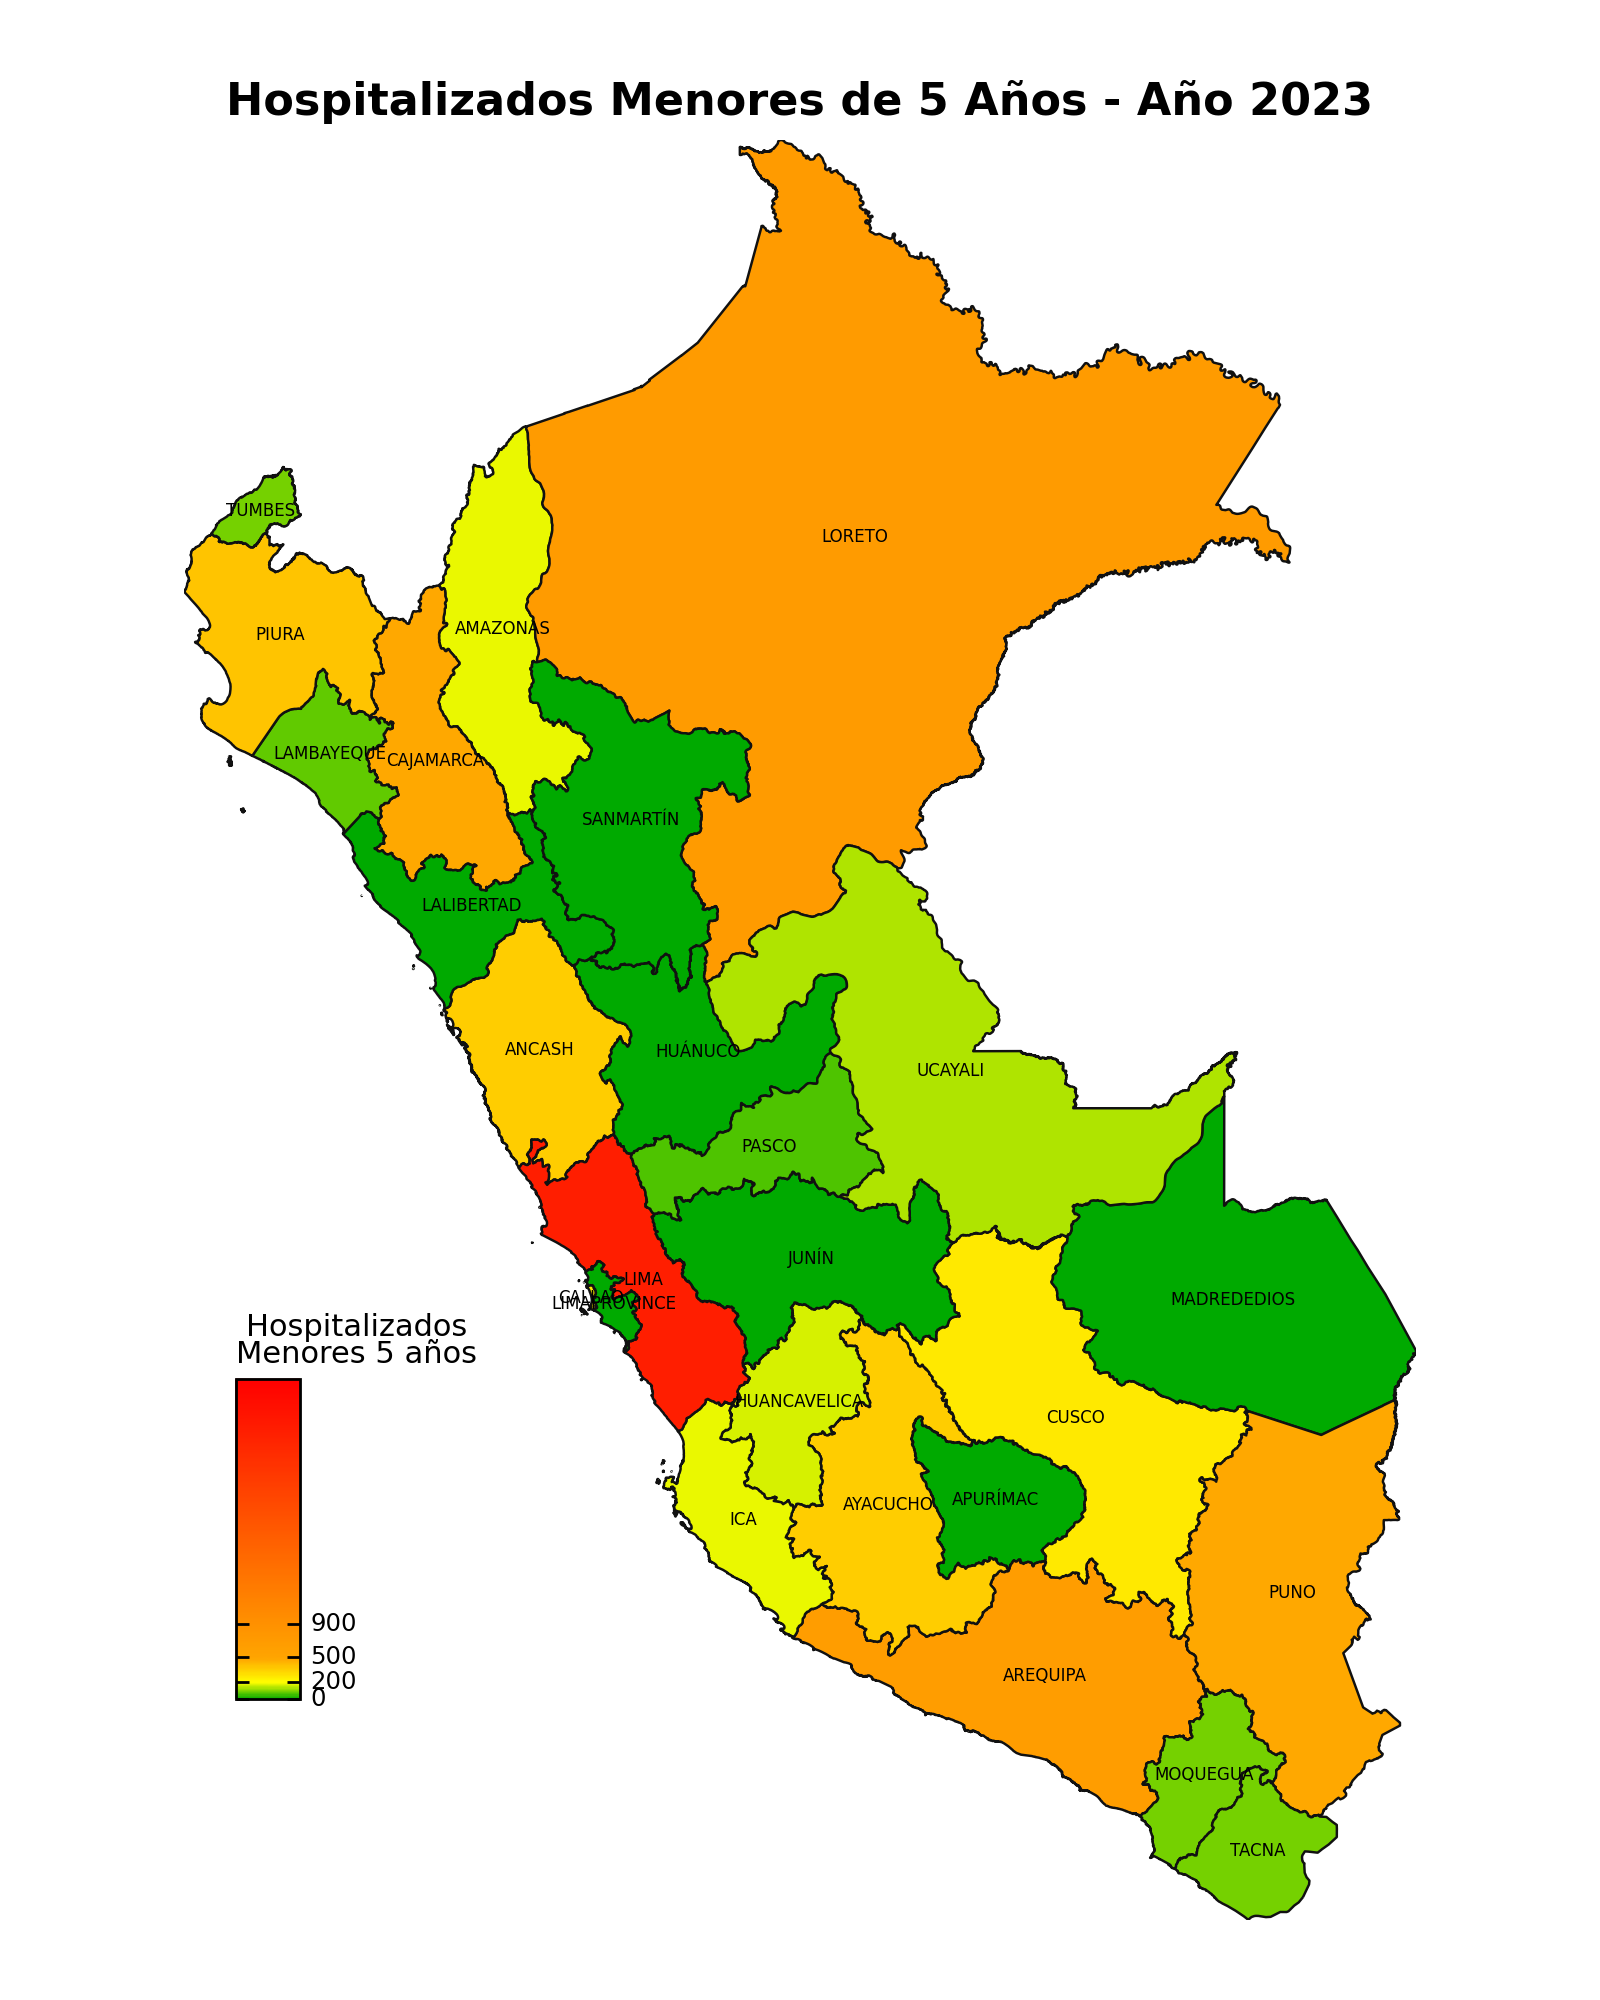

In [ ]:
# 1️⃣ Importar módulos
import geopandas as gp
import pandas as pd
import numpy as np
import os
from plotnine import (
    ggplot,
    aes,
    coord_fixed,
    geom_map,
    geom_text,
    labs,
    scale_fill_gradientn,
    theme_void,
    theme,
    element_rect,
    element_line,
    element_text,
    stage,
)

# 2️⃣ Funciones auxiliares
def good_centroid(geometry):
    """
    Calcula centroides 'buenos' para polígonos en la geometría.
    Usa proyección de área igual para mayor precisión.
    """
    return geometry.to_crs("+proj=cea").centroid.to_crs(geometry.crs)

def overlay_color(rgb_hex_colors, light="white", dark="black", threshold=0.5):
    """
    Determina color de texto (claro u oscuro) según el fondo.
    """
    def luminance(rgb_hex):
        r = int(rgb_hex[1:3], 16)
        g = int(rgb_hex[3:5], 16)
        b = int(rgb_hex[5:], 16)
        return (r*0.299 + g*0.587 + b*0.0722) / 256
    return [light if luminance(x) < threshold else dark for x in rgb_hex_colors]

# 3️⃣ Cargar datos geoespaciales de Perú
url = "https://geodata.ucdavis.edu/gadm/gadm4.1/json/gadm41_PER_1.json"
peru = gp.read_file(url)

# 4️⃣ Preparar datos con tu DataFrame
# Asumiendo que ya tienes df_departamento_hospitalizados_men5_last_5_years cargado

# Crear estructura base con geometrías
data = peru[['NAME_1', 'geometry']].copy()
data = data.rename(columns={'NAME_1': 'departamento'})

# Normalizar nombres de departamentos en ambos DataFrames
data['departamento'] = data['departamento'].str.upper().str.strip()
df_departamento_hospitalizados_men5_last_5_years['departamento'] = (
    df_departamento_hospitalizados_men5_last_5_years['departamento'].str.upper().str.strip()
)

# Pivotar tus datos para tener un año por columna
df_pivot = df_departamento_hospitalizados_men5_last_5_years.pivot(
    index='departamento',
    columns='ano',
    values='hospitalizados_men5'
).reset_index()

# Renombrar columnas de años a string
df_pivot.columns = ['departamento'] + [str(col) for col in df_pivot.columns[1:]]

# Merge con datos geográficos
data = data.merge(df_pivot, on='departamento', how='left')

# NO rellenar valores faltantes - los dejaremos como NaN para identificarlos
year_columns = [col for col in data.columns if col.isdigit()]

# Calcular coordenadas centrales
data['center_lon'] = good_centroid(data.geometry).x
data['center_lat'] = good_centroid(data.geometry).y

# Reestructurar en formato largo
data_long = data.melt(
    id_vars=['departamento', 'geometry', 'center_lon', 'center_lat'],
    value_vars=year_columns,
    var_name='ano',
    value_name='hospitalizados_men5',
)

# Ordenar por año
data_long['ano'] = data_long['ano'].astype(int)
data_long = data_long.sort_values('ano')

# Crear columna para identificar valores sin datos o con cero
data_long['tiene_datos'] = data_long['hospitalizados_men5'].notna() & (data_long['hospitalizados_men5'] > 0)

# Rellenar NaN con -1 para diferenciarlos en el gráfico
data_long['hospitalizados_men5_plot'] = data_long['hospitalizados_men5'].fillna(-1)
# Los ceros también se marcan como -1 para pintarlos de gris
data_long.loc[data_long['hospitalizados_men5_plot'] == 0, 'hospitalizados_men5_plot'] = -1

# 5️⃣ Calcular límites dinámicos para la escala de color (solo valores positivos)
max_value = data_long[data_long['hospitalizados_men5_plot'] > 0]['hospitalizados_men5_plot'].max()

# 6️⃣ VARIABLE DE SELECCIÓN DE AÑO
ano_selected = 2023  # 👈 Cambia este valor al año que desees visualizar

# Verificar que el año existe en los datos
years_available = sorted(data_long['ano'].unique())
if ano_selected not in years_available:
    print(f"⚠️ Advertencia: El año {ano_selected} no está disponible en los datos.")
    print(f"Años disponibles: {years_available}")
else:
    # 7️⃣ Crear directorio reports/ si no existe
    os.makedirs('reports', exist_ok=True)
    
    # 8️⃣ Filtrar datos para el año seleccionado
    data_year = data_long[data_long['ano'] == ano_selected].copy()
    
    # 9️⃣ Definir los puntos de corte y colores
    # Menos de 200: verde
    # 200-500: amarillo
    # 500-900: naranja
    # 900+: rojo
    
    # Normalizar los valores para la escala de colores
    limite_superior = max(max_value * 1.1, 1000)
    
    # Colores y valores normalizados (deben terminar en 1)
    colors = ['#00AA00', '#FFFF00', '#FFA500', '#FF0000']  # Verde, Amarillo, Naranja, Rojo
    values = [0, 200/limite_superior, 500/limite_superior, 1.0]  # Debe terminar en 1.0
    
    # 🔟 Crear el gráfico
    p = (
        ggplot(data_year)
        + geom_map(aes(fill='hospitalizados_men5_plot'))
        + geom_text(
            aes(
                'center_lon',
                'center_lat',
                label='departamento'
            ),
            color='black',  # Texto siempre negro
            size=6,
            show_legend=False
        )
        + scale_fill_gradientn(
            name='Hospitalizados\nMenores 5 años',
            colors=colors,
            values=values,
            limits=[0, limite_superior],
            na_value='#D3D3D3',  # Gris claro para valores sin datos
            breaks=[0, 200, 500, 900],
        )
        + coord_fixed(expand=False)
        + labs(title=f'Hospitalizados Menores de 5 Años - Año {ano_selected}')
        + theme_void()
        + theme(
            figure_size=(8, 10),
            legend_position=(0.05, 0.15),
            legend_direction='vertical',
            legend_title_position='top',
            plot_margin=0.05,
            plot_background=element_rect(fill='white'),
            legend_frame=element_rect(color='black'),
            legend_ticks=element_line(color='black'),
            plot_title=element_text(size=16, weight='bold', ha='center'),
        )
    )
    
    # Guardar el gráfico en la carpeta reports/
    output_path = f'reports/mapa_hospitalizados_{ano_selected}.png'
    p.save(output_path, dpi=300, width=8, height=10)
    print(f"✅ Gráfico guardado: {output_path}")
    print(f"📊 Mostrando mapa para el año {ano_selected}:\n")
    
    # Mostrar el gráfico
    display(p)